# Analysis of the Futures Volume and BTC Price


## Overview
### 中文版：
‘total_volume’ 和 ‘avg_btc_price’ 之间虽然存在正相关性，相关性系数在0.91左右，通过线性分析，即使两者存在一定的线性关系，但这个关系并不强，离散数据点过多。
如果使用多项式回归分析，使用一个三次多项式回归，我们的模型在训练数据上表现良好，但在交叉验证中表现不佳，这可能表明模型在训练数据上过拟合了。
交叉验证的分数是 -0.12，

交叉验证的分数太低，模型是不具备预测效果的。

只能从大致数据分布看一看，大概的趋势，或者从历史数据中推测大致的走向。

由于数据时间跨度大，分别对持仓量 <15B & 2023年的数据进行了拟合。
从波动性出发，‘avg_btc_price’ 的日波动率 （>5%），观察 ‘total_volume’。
‘avg_btc_price’ 和 ‘total_volume’ 的日波动率之间的关系。绿色是 ‘total_volume’ 的日波动率>5% 。
当 ‘total_volume_change’ 较大时，‘avg_btc_price_change’ 也倾向于较大。这可能表明 ‘total_volume’ 的大波动可能会引起 ‘avg_btc_price’ 的大波动。
 ‘total_volume_change’ 和 ‘avg_btc_price_change’ 之间的相关性 = 0.605
正相关性但并不强。
其实模型效果不好，但如果就图表还是可以说明一下合约对价格的导向作用，以及今年合约持仓量的位置。

### English Version:

Although there is a positive correlation between 'total_volume' and 'avg_btc_price', the correlation coefficient is around 0.91.
Through linear analysis, even if there is a certain linear relationship between the two, the relationship is not strong and there are too many discrete data points.
If we use polynomial regression analysis and use a third-degree polynomial regression, our model performs well on the training data, but poorly on cross-validation, which may indicate that the model is overfitting on the training data.
The cross-validation score is -0.12,

The cross-validation score is too low, the model does not have predictive effect.

Can only look at the general trend from the distribution of data, or infer the general trend from historical data.

Due to the large time span of the data, the data of <15B & 2023 are fitted respectively.
From the perspective of volatility, the daily volatility of 'avg_btc_price' (>5%) is observed.
The relationship between the daily volatility of 'avg_btc_price' and 'total_volume'. Green is the daily volatility of 'total_volume' >5%.
When 'total_volume_change' is large, 'avg_btc_price_change' tends to be large. This may indicate that the large fluctuation of 'total_volume' may cause the large fluctuation of 'avg_btc_price'.

The correlation between 'total_volume_change' and 'avg_btc_price_change' = 0.605
Positive correlation but not strong.

In fact, the model effect is not good, but if you look at the chart, you can still explain the guiding role of the contract on the price, and the position of the contract volume this year.

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql


class Mysql:
    # database, table name
    def __init__(self, db_name):
        self.mydb = pymysql.connect(
            host='localhost',
            user='root',
            password='password',
            database=db_name,
        )
        self.cursor = self.mydb.cursor()

    def __del__(self):
        self.cursor.close()
        self.mydb.close()

    def commit(self, query):
        print(query)
        try:
            self.cursor.execute(query)
            self.mydb.commit()
        except Exception as e:
            print(e)

    def fetch(self, query):
        print(query)
        try:
            self.cursor.execute(query)
            return self.cursor.fetchall()
        except Exception as e:
            print(e)
            return None

In [208]:
Mysql = Mysql('BN')
df_futures = pd.DataFrame(Mysql.fetch("""select ds,
                                                sum(volume) as total_volume,
                                                avg(btc_price) as avg_btc_price
                                      from futures_volume
                                      group by ds"""), columns=['ds', 'total_volume', 'avg_btc_price'])

select ds,
                                                sum(volume) as total_volume,
                                                avg(btc_price) as avg_btc_price
                                      from futures_volume
                                      group by ds


In [209]:
df_futures

,ds,total_volume,avg_btc_price
0,2020-02-27 19:00:00,3.391169e+09,8807.750000
1,2020-02-28 19:00:00,2.955134e+09,8719.250000
2,2020-02-29 19:00:00,2.927927e+09,8543.500000
3,2020-03-01 19:00:00,2.994903e+09,8534.400391
4,2020-03-02 19:00:00,2.954106e+09,8915.500000
...,...,...,...
1215,2023-07-03 20:00:00,1.458675e+10,31173.000000
1216,2023-07-04 20:00:00,1.438468e+10,30786.199219
1217,2023-07-05 20:00:00,1.447192e+10,30505.000000
1218,2023-07-06 20:00:00,1.349159e+10,29926.000000


In [210]:
df_futures['btc_volume'] = df_futures.total_volume / df_futures.avg_btc_price

In [211]:
df_futures

,ds,total_volume,avg_btc_price,btc_volume
0,2020-02-27 19:00:00,3.391169e+09,8807.750000,385021.082569
1,2020-02-28 19:00:00,2.955134e+09,8719.250000,338920.713593
2,2020-02-29 19:00:00,2.927927e+09,8543.500000,342708.094809
3,2020-03-01 19:00:00,2.994903e+09,8534.400391,350921.281276
4,2020-03-02 19:00:00,2.954106e+09,8915.500000,331344.979867
...,...,...,...,...
1215,2023-07-03 20:00:00,1.458675e+10,31173.000000,467928.837327
1216,2023-07-04 20:00:00,1.438468e+10,30786.199219,467244.561883
1217,2023-07-05 20:00:00,1.447192e+10,30505.000000,474411.266874
1218,2023-07-06 20:00:00,1.349159e+10,29926.000000,450831.554334


In [212]:
df_futures.corr()

/var/folders/7q/mkf85tgs0xnbn5wbkjqsfcxr0000gn/T/ipykernel_34594/673298769.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_futures.corr()


,total_volume,avg_btc_price,btc_volume
total_volume,1.000000,0.906837,0.052074
avg_btc_price,0.906837,1.000000,-0.349687
btc_volume,0.052074,-0.349687,1.000000


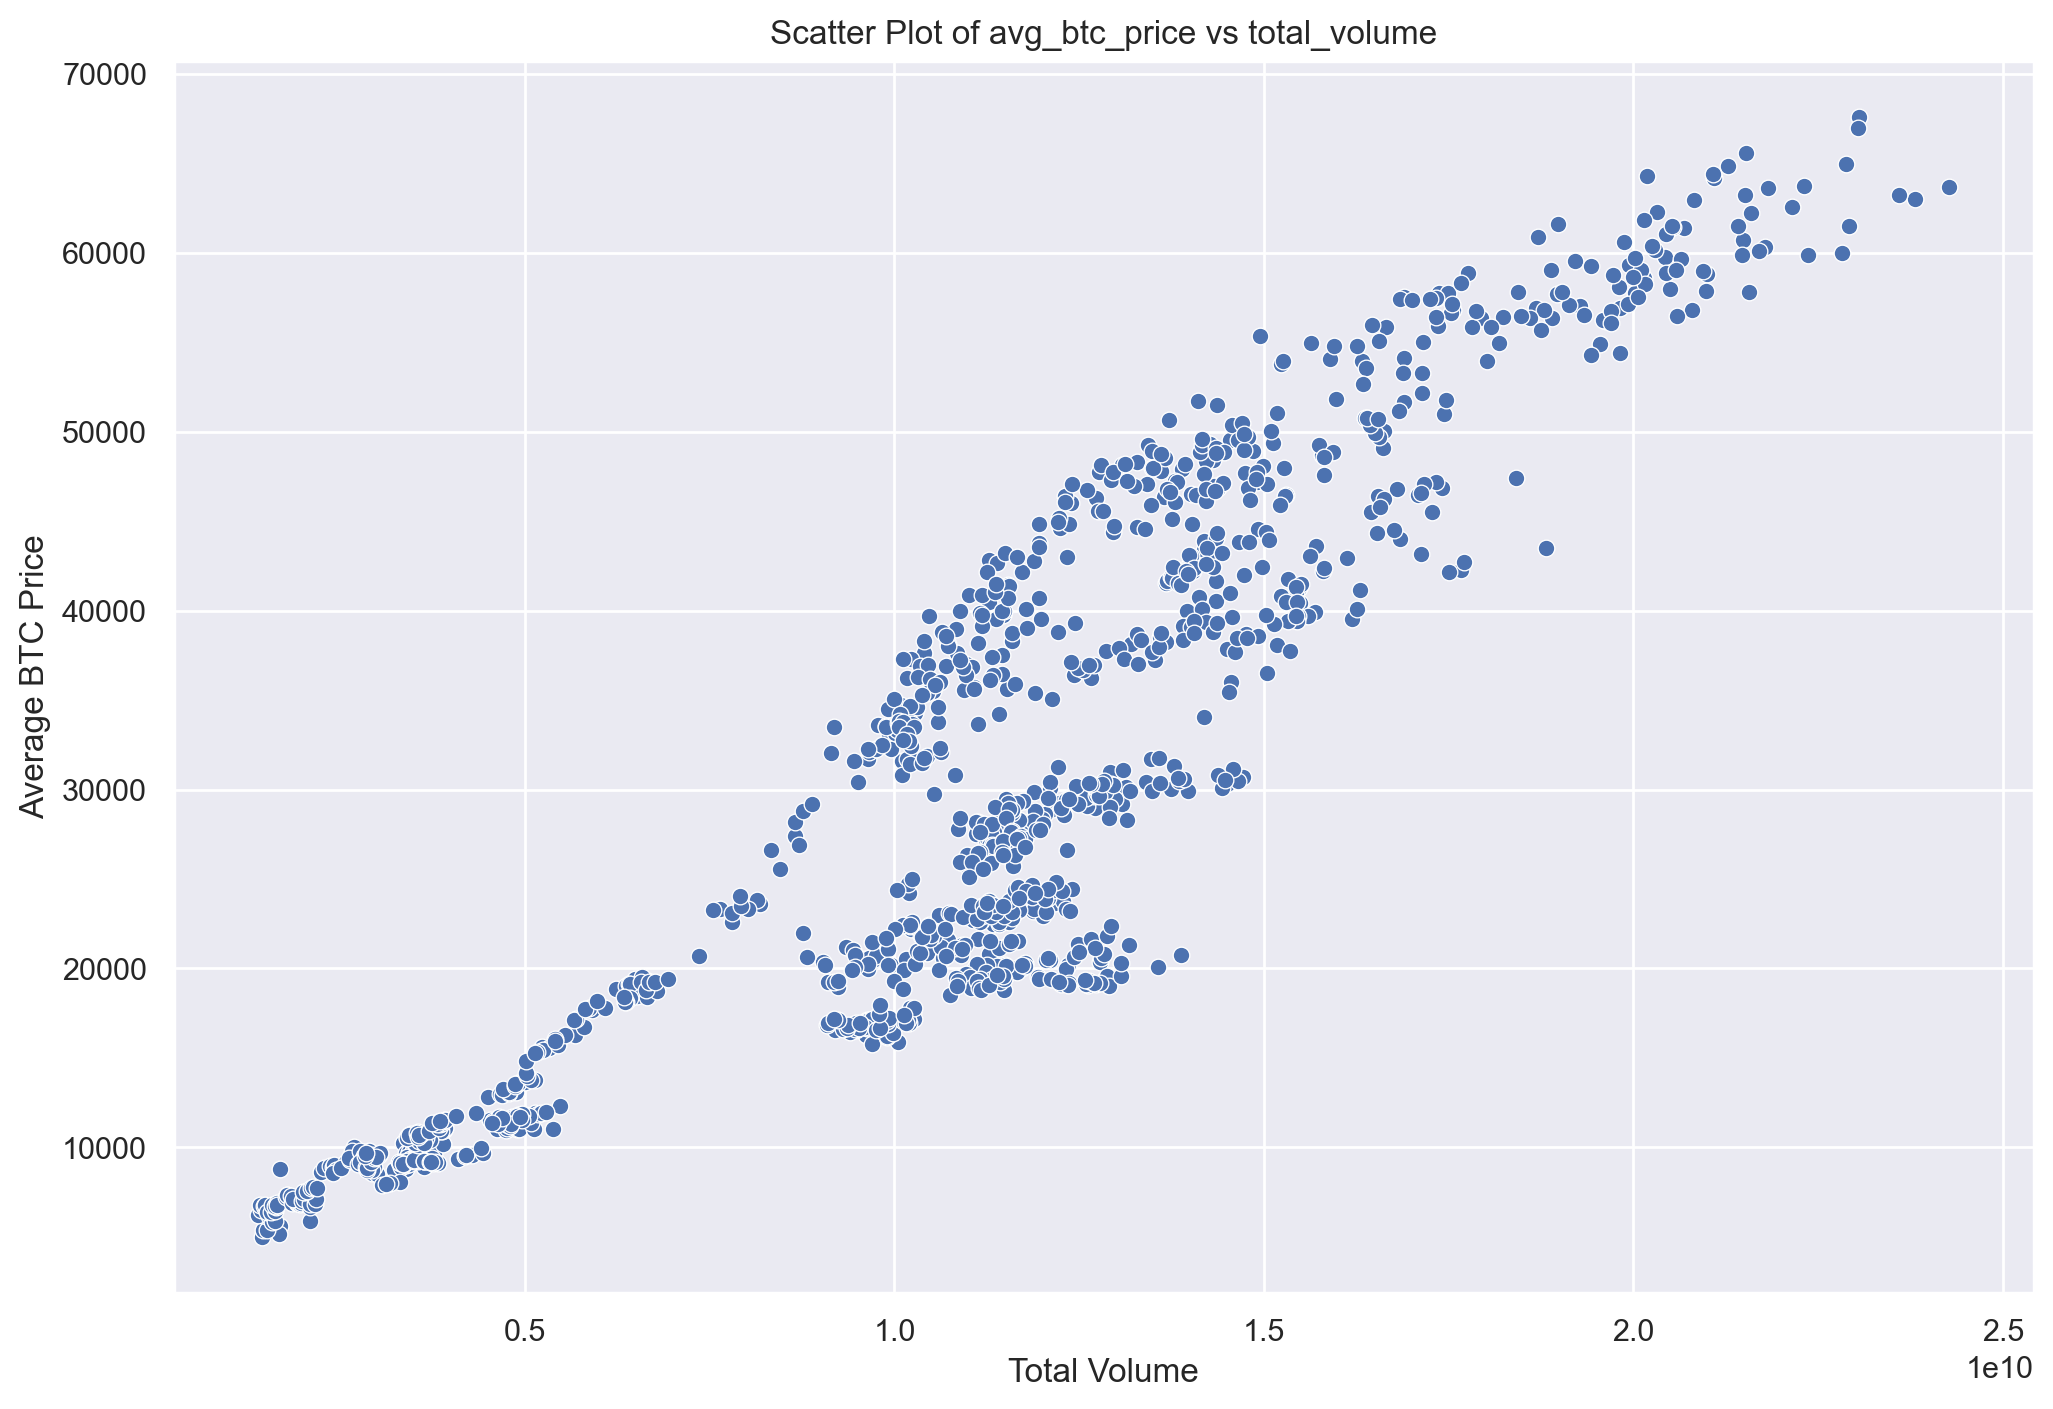

0.9068365031652821

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Scatter plot
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='total_volume', y='avg_btc_price', data=df_futures)
plt.title('Scatter Plot of avg_btc_price vs total_volume')
plt.xlabel('Total Volume')
plt.ylabel('Average BTC Price')
plt.show()

# Correlation
correlation, _ = pearsonr(df_futures['total_volume'], df_futures['avg_btc_price'])
correlation

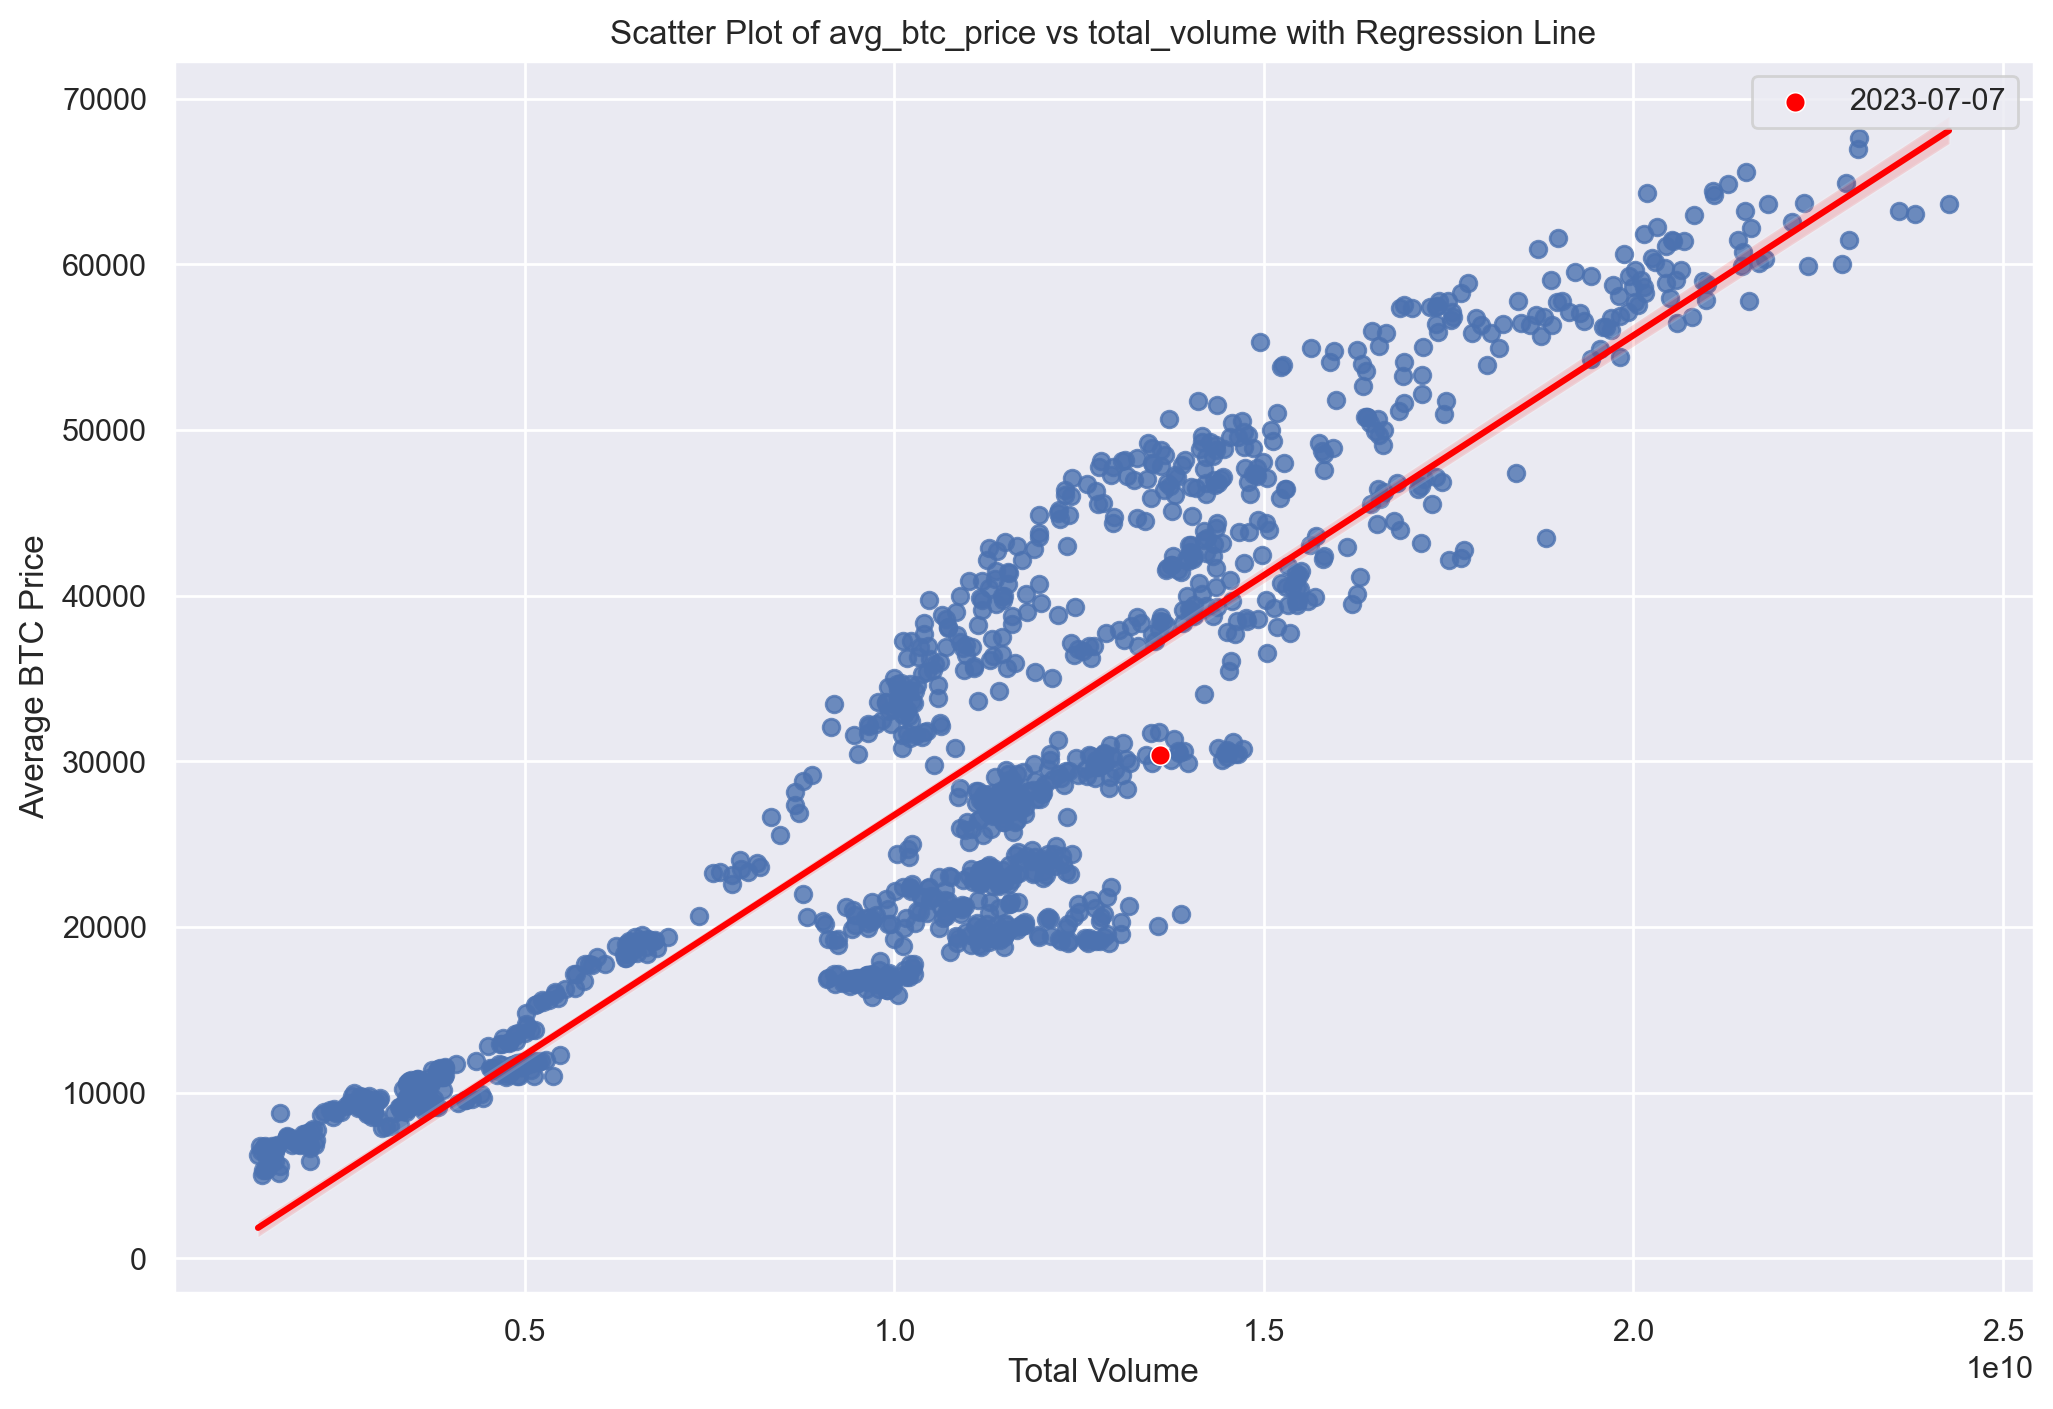

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data again

# Convert 'ds' column to datetime and sort the data by date
df_futures['ds'] = pd.to_datetime(df_futures['ds'])
data = df_futures.sort_values(by='ds')

# Scatter plot with a regression line
plt.figure(figsize=(12, 8), dpi=200)
sns.regplot(x='total_volume', y='avg_btc_price', data=data, line_kws={"color": "red"})
sns.scatterplot(x='total_volume', y='avg_btc_price', data=data[data.ds == '2023-07-07 20:00:00'], color='red',
                alpha=1, s=50, label='2023-07-07')

plt.title('Scatter Plot of avg_btc_price vs total_volume with Regression Line')
plt.xlabel('Total Volume')
plt.ylabel('Average BTC Price')
plt.show()

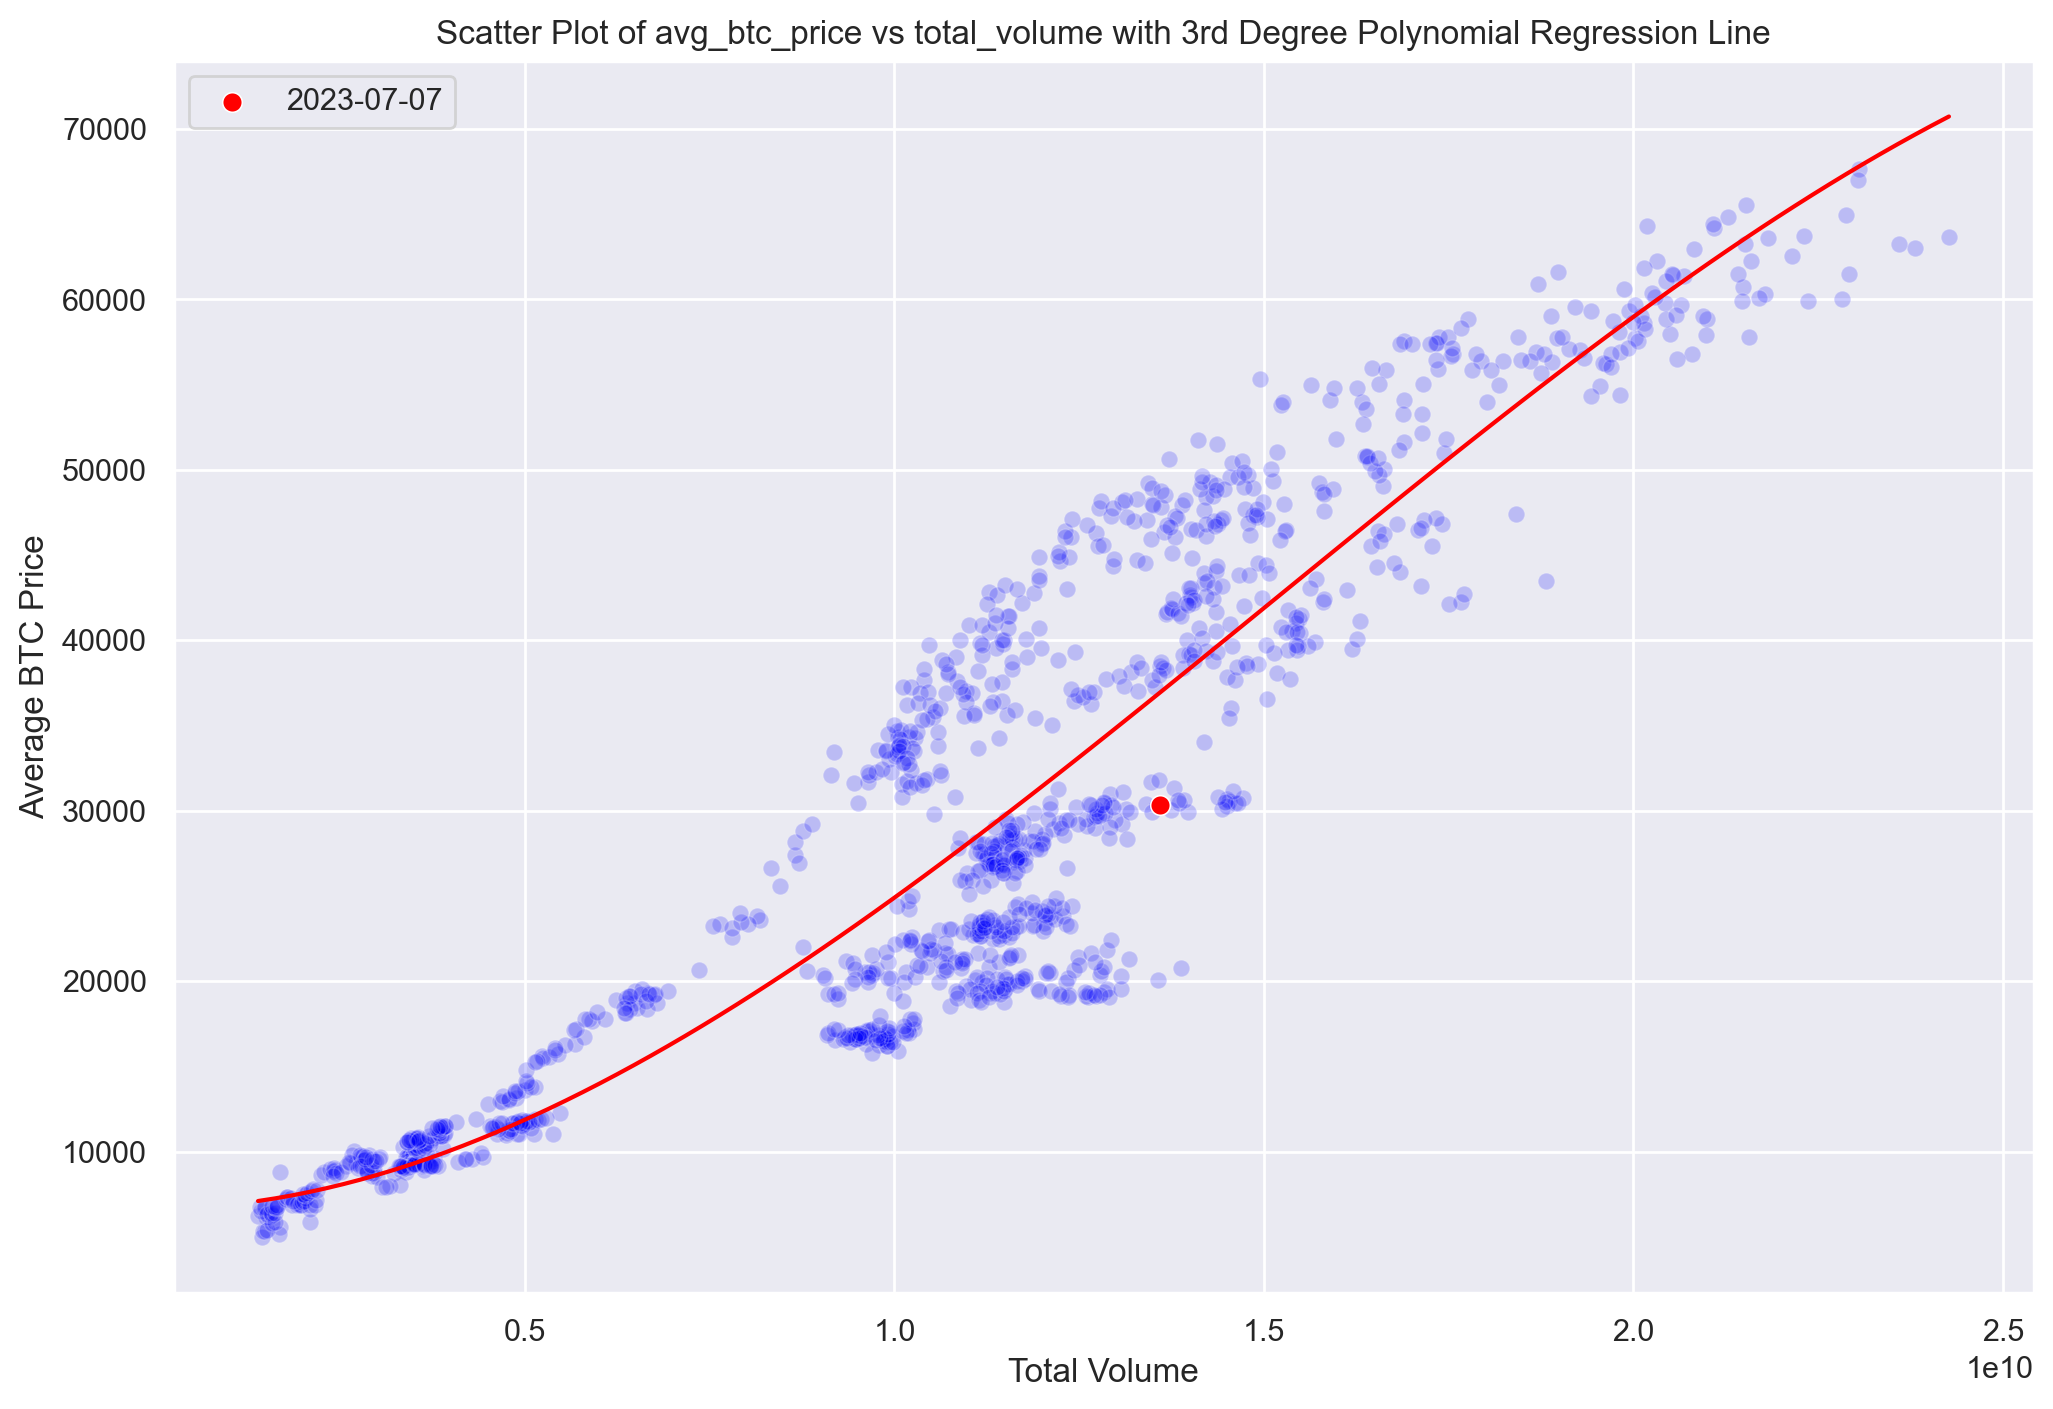

(array([ 0.00000000e+00, -1.51581589e-26,  2.33844482e-16, -5.15411436e-27]),
 6661.823978261957)

In [215]:
import sklearn.linear_model as lm
from sklearn.preprocessing import PolynomialFeatures

poly_3 = PolynomialFeatures(degree=3)

total_volume_poly_3 = poly_3.fit_transform(data['total_volume'].values.reshape(-1, 1))

model_poly_3 = lm.LinearRegression()
model_poly_3.fit(total_volume_poly_3, data['avg_btc_price'])

poly_coefs_3 = model_poly_3.coef_
poly_intercept_3 = model_poly_3.intercept_

total_volume_range_3 = np.linspace(data['total_volume'].min(), data['total_volume'].max(), num=100).reshape(-1, 1)

total_volume_range_poly_3 = poly_3.transform(total_volume_range_3)

avg_btc_price_predicted_3 = model_poly_3.predict(total_volume_range_poly_3)

plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='total_volume', y='avg_btc_price', data=data, color='blue', alpha=0.2)
sns.scatterplot(x='total_volume', y='avg_btc_price', data=data[data.ds == '2023-07-07 20:00:00'], color='red',
                alpha=1, s=50, label='2023-07-07')
plt.plot(total_volume_range_3, avg_btc_price_predicted_3, color='red')
plt.title('Scatter Plot of avg_btc_price vs total_volume with 3rd Degree Polynomial Regression Line')
plt.xlabel('Total Volume')
plt.ylabel('Average BTC Price')
plt.show()

poly_coefs_3, poly_intercept_3


In [216]:
from sklearn.model_selection import cross_val_score

poly_cv = PolynomialFeatures(degree=3)

total_volume_poly_cv = poly_cv.fit_transform(data['total_volume'].values.reshape(-1, 1))

model_poly_cv = lm.LinearRegression()

scores = cross_val_score(model_poly_cv, total_volume_poly_cv, data['avg_btc_price'], cv=5)
mean_score = scores.mean()

mean_score

# 交叉验证的分数太低，模型是不具备预测效果的。
# 只能从大致数据分布看一看，大概的趋势。


-0.11989126770538472

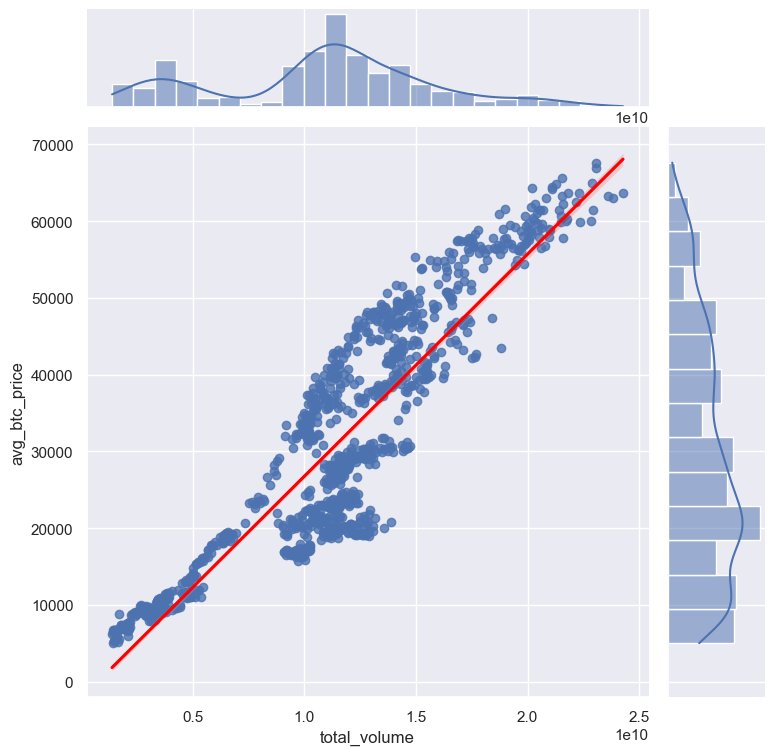

In [217]:
joint_plot = sns.jointplot(x='total_volume', y='avg_btc_price', data=data, color='b', kind='reg',
                           joint_kws={'line_kws': {'color': 'red'}}).figure.set_size_inches(8, 8)

plt.show()

In [218]:
data

,ds,total_volume,avg_btc_price,btc_volume
0,2020-02-27 19:00:00,3.391169e+09,8807.750000,385021.082569
1,2020-02-28 19:00:00,2.955134e+09,8719.250000,338920.713593
2,2020-02-29 19:00:00,2.927927e+09,8543.500000,342708.094809
3,2020-03-01 19:00:00,2.994903e+09,8534.400391,350921.281276
4,2020-03-02 19:00:00,2.954106e+09,8915.500000,331344.979867
...,...,...,...,...
1215,2023-07-03 20:00:00,1.458675e+10,31173.000000,467928.837327
1216,2023-07-04 20:00:00,1.438468e+10,30786.199219,467244.561883
1217,2023-07-05 20:00:00,1.447192e+10,30505.000000,474411.266874
1218,2023-07-06 20:00:00,1.349159e+10,29926.000000,450831.554334


In [219]:
data_focus = data.where(data['total_volume'] < 15000000000).dropna()
data_focus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1219
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ds             1022 non-null   datetime64[ns]
 1   total_volume   1022 non-null   float64       
 2   avg_btc_price  1022 non-null   float64       
 3   btc_volume     1022 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 39.9 KB


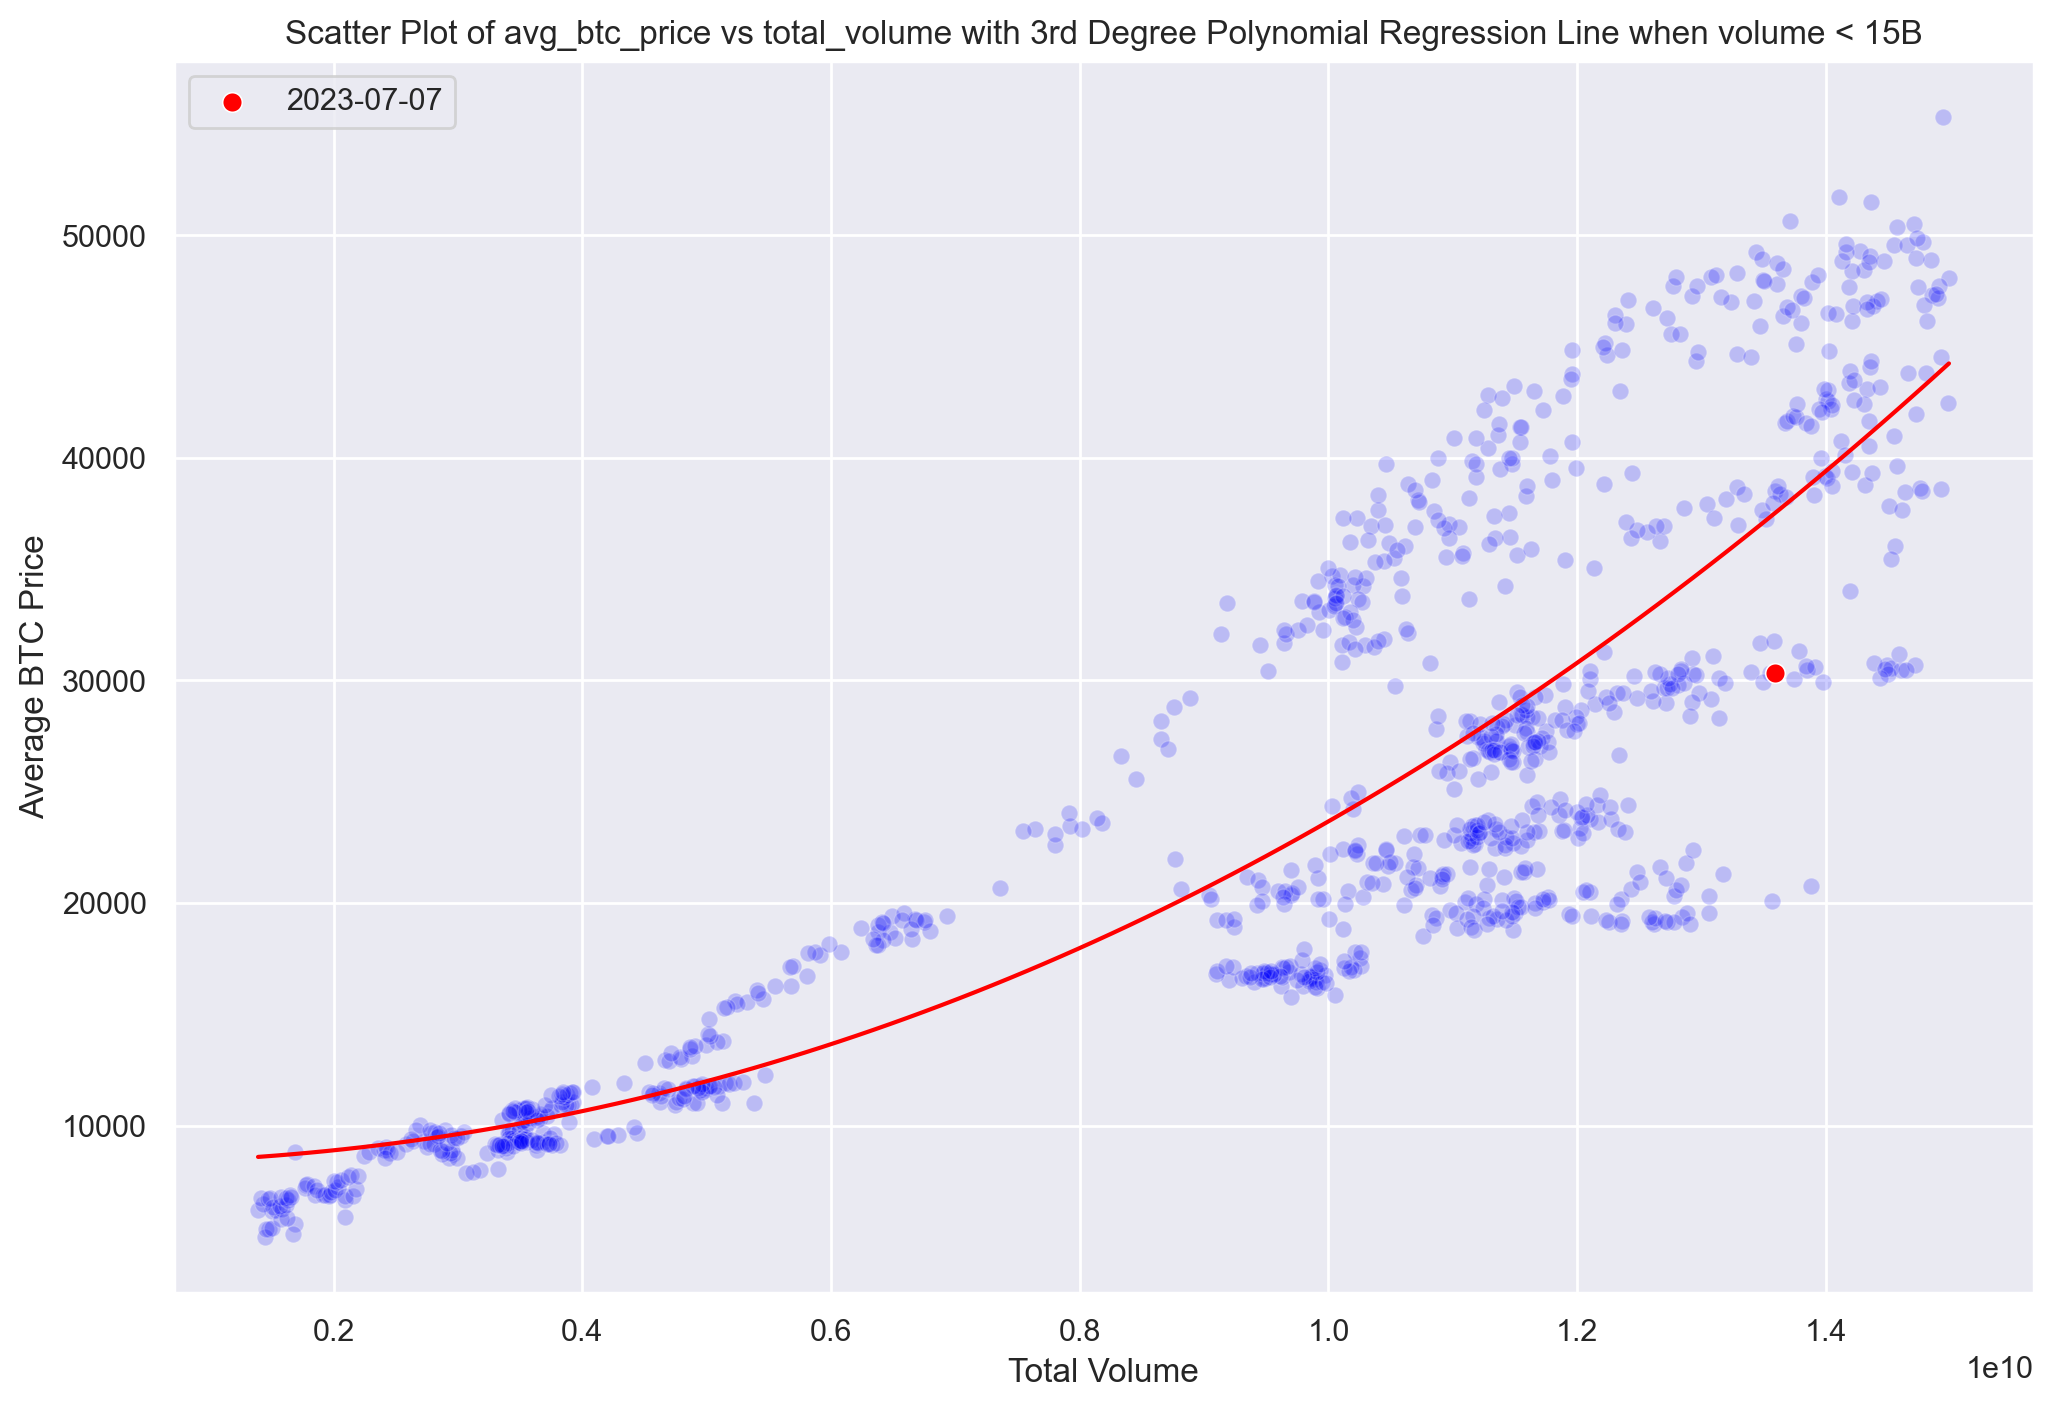

(array([ 0.00000000e+00, -1.09440754e-26,  1.40748836e-16,  1.27580522e-27]),
 8318.908166849485)

In [220]:
import sklearn.linear_model as lm
from sklearn.preprocessing import PolynomialFeatures

data = data_focus
poly_3 = PolynomialFeatures(degree=3)

total_volume_poly_3 = poly_3.fit_transform(data['total_volume'].values.reshape(-1, 1))

model_poly_3 = lm.LinearRegression()
model_poly_3.fit(total_volume_poly_3, data['avg_btc_price'])

poly_coefs_3 = model_poly_3.coef_
poly_intercept_3 = model_poly_3.intercept_

total_volume_range_3 = np.linspace(data['total_volume'].min(), data['total_volume'].max(), num=100).reshape(-1, 1)

total_volume_range_poly_3 = poly_3.transform(total_volume_range_3)

avg_btc_price_predicted_3 = model_poly_3.predict(total_volume_range_poly_3)

plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='total_volume', y='avg_btc_price', data=data, color='blue', alpha=0.2)
sns.scatterplot(x='total_volume', y='avg_btc_price', data=data[data.ds == '2023-07-07 20:00:00'], color='red',
                alpha=1, s=50, label='2023-07-07')

plt.plot(total_volume_range_3, avg_btc_price_predicted_3, color='red')
plt.title('Scatter Plot of avg_btc_price vs total_volume with 3rd Degree Polynomial Regression Line when volume < 15B')
plt.xlabel('Total Volume')
plt.ylabel('Average BTC Price')
plt.show()

poly_coefs_3, poly_intercept_3


In [221]:
data_focus = data.where(data['ds'] > '2023-01-01').dropna()
data_focus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 1032 to 1219
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ds             188 non-null    datetime64[ns]
 1   total_volume   188 non-null    float64       
 2   avg_btc_price  188 non-null    float64       
 3   btc_volume     188 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 7.3 KB


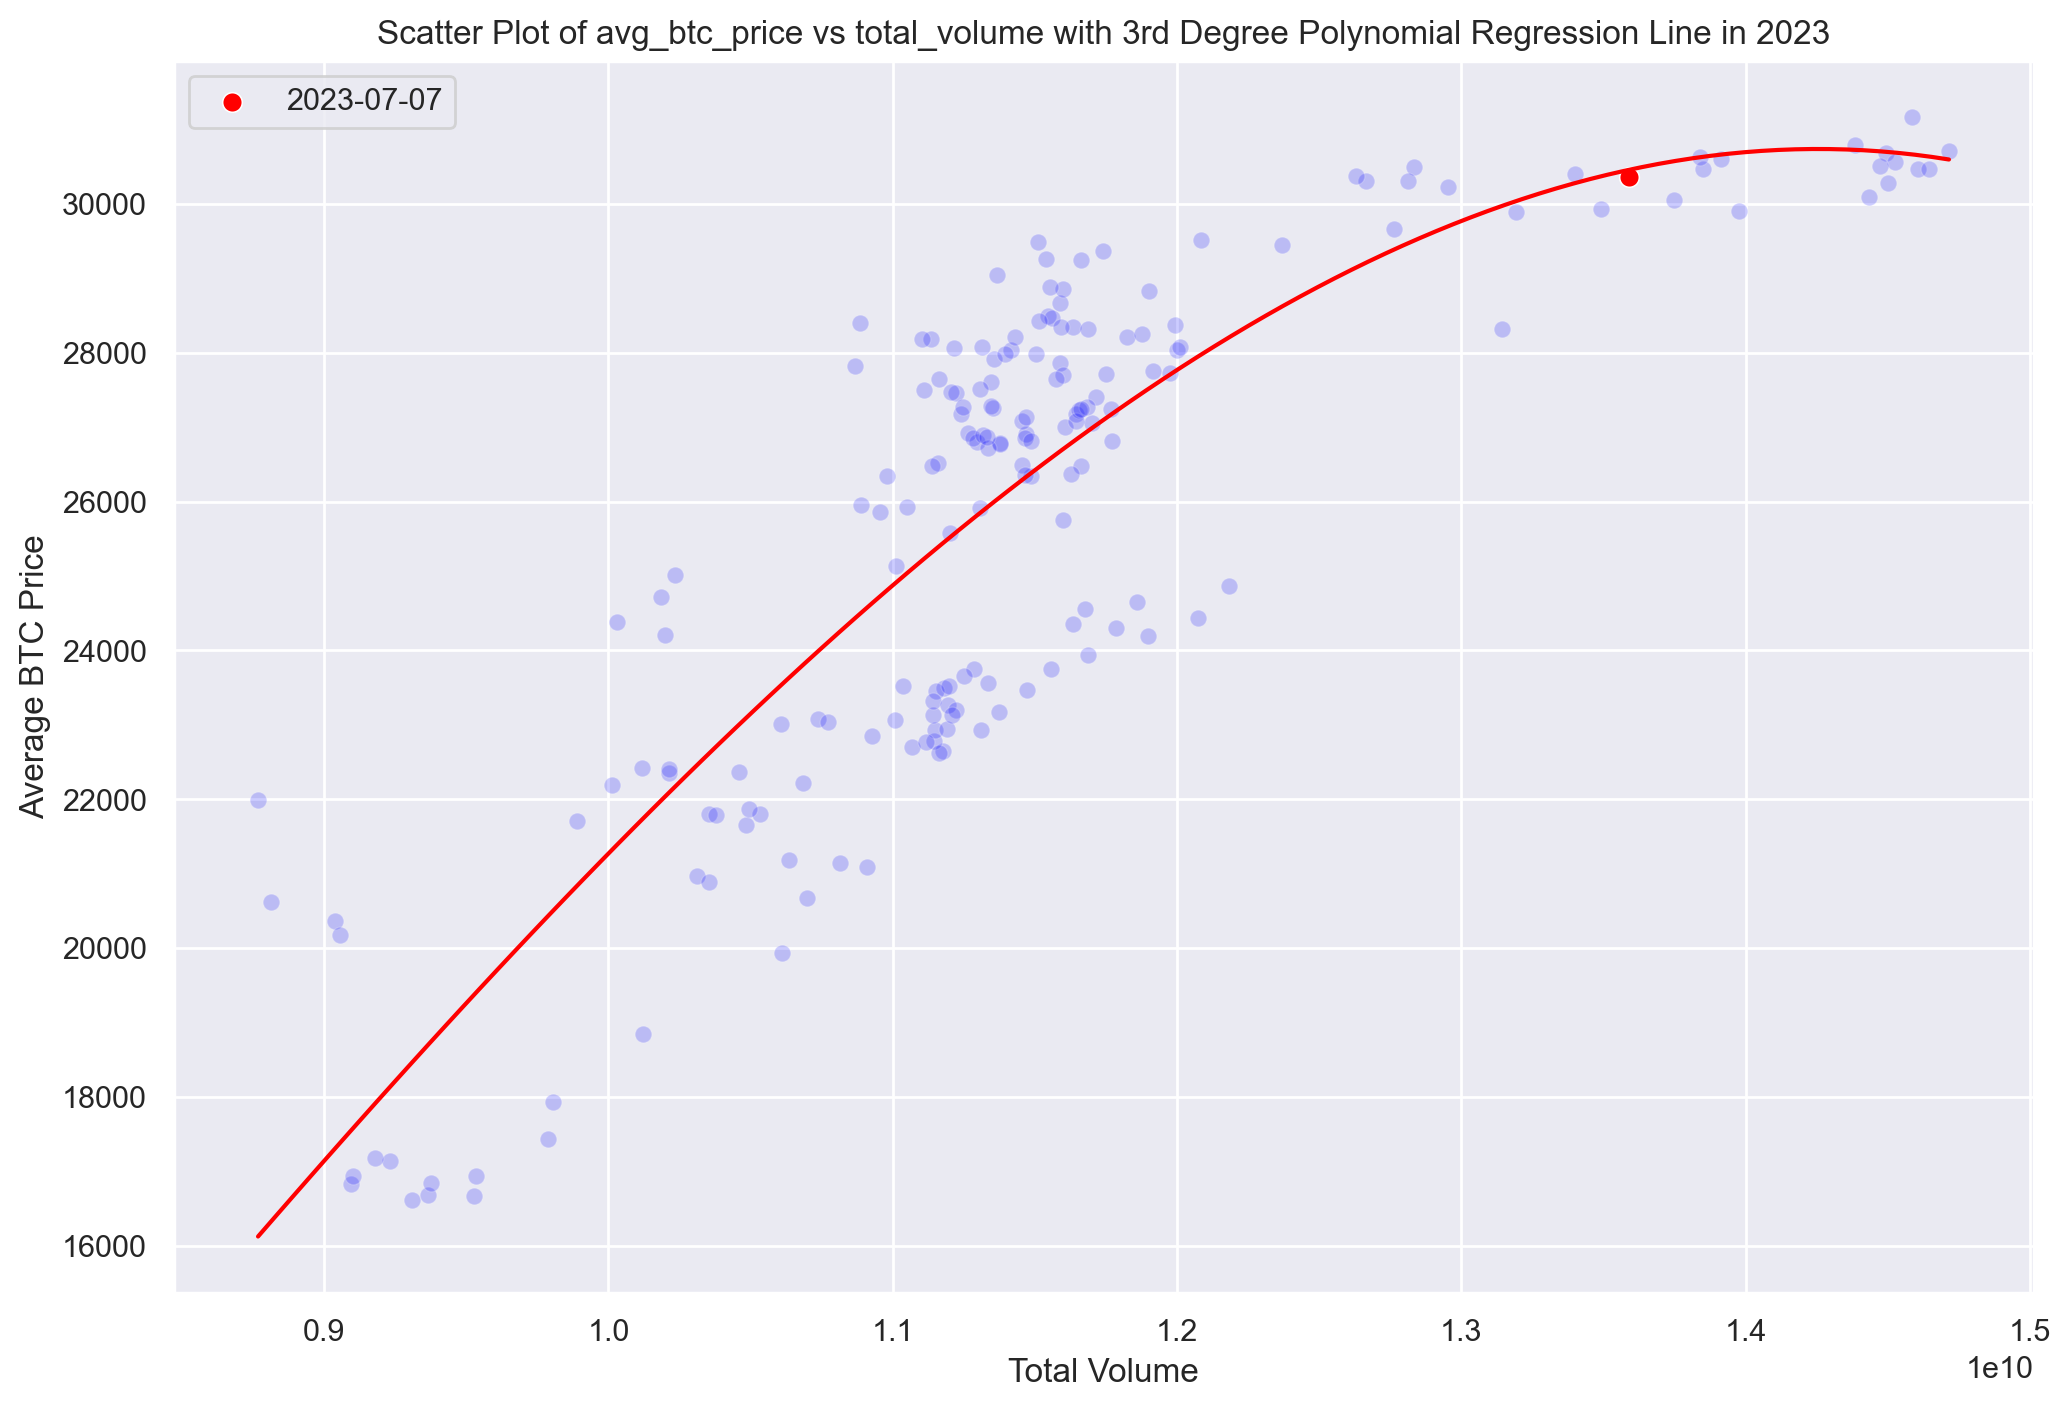

(array([ 0.00000000e+00, -4.02243862e-26,  6.52810342e-16, -3.05301642e-26]),
 -13481.568630638601)

In [222]:
import sklearn.linear_model as lm
from sklearn.preprocessing import PolynomialFeatures

data = data_focus
poly_3 = PolynomialFeatures(degree=3)

total_volume_poly_3 = poly_3.fit_transform(data['total_volume'].values.reshape(-1, 1))

model_poly_3 = lm.LinearRegression()
model_poly_3.fit(total_volume_poly_3, data['avg_btc_price'])

poly_coefs_3 = model_poly_3.coef_
poly_intercept_3 = model_poly_3.intercept_

total_volume_range_3 = np.linspace(data['total_volume'].min(), data['total_volume'].max(), num=100).reshape(-1, 1)

total_volume_range_poly_3 = poly_3.transform(total_volume_range_3)

avg_btc_price_predicted_3 = model_poly_3.predict(total_volume_range_poly_3)

plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='total_volume', y='avg_btc_price', data=data, color='blue', alpha=0.2)
sns.scatterplot(x='total_volume', y='avg_btc_price', data=data[data.ds == '2023-07-07 20:00:00'], color='red',
                alpha=1, s=50, label='2023-07-07')

plt.plot(total_volume_range_3, avg_btc_price_predicted_3, color='red')
plt.title('Scatter Plot of avg_btc_price vs total_volume with 3rd Degree Polynomial Regression Line in 2023')
plt.xlabel('Total Volume')
plt.ylabel('Average BTC Price')
plt.show()

poly_coefs_3, poly_intercept_3


In [223]:
data = df_futures

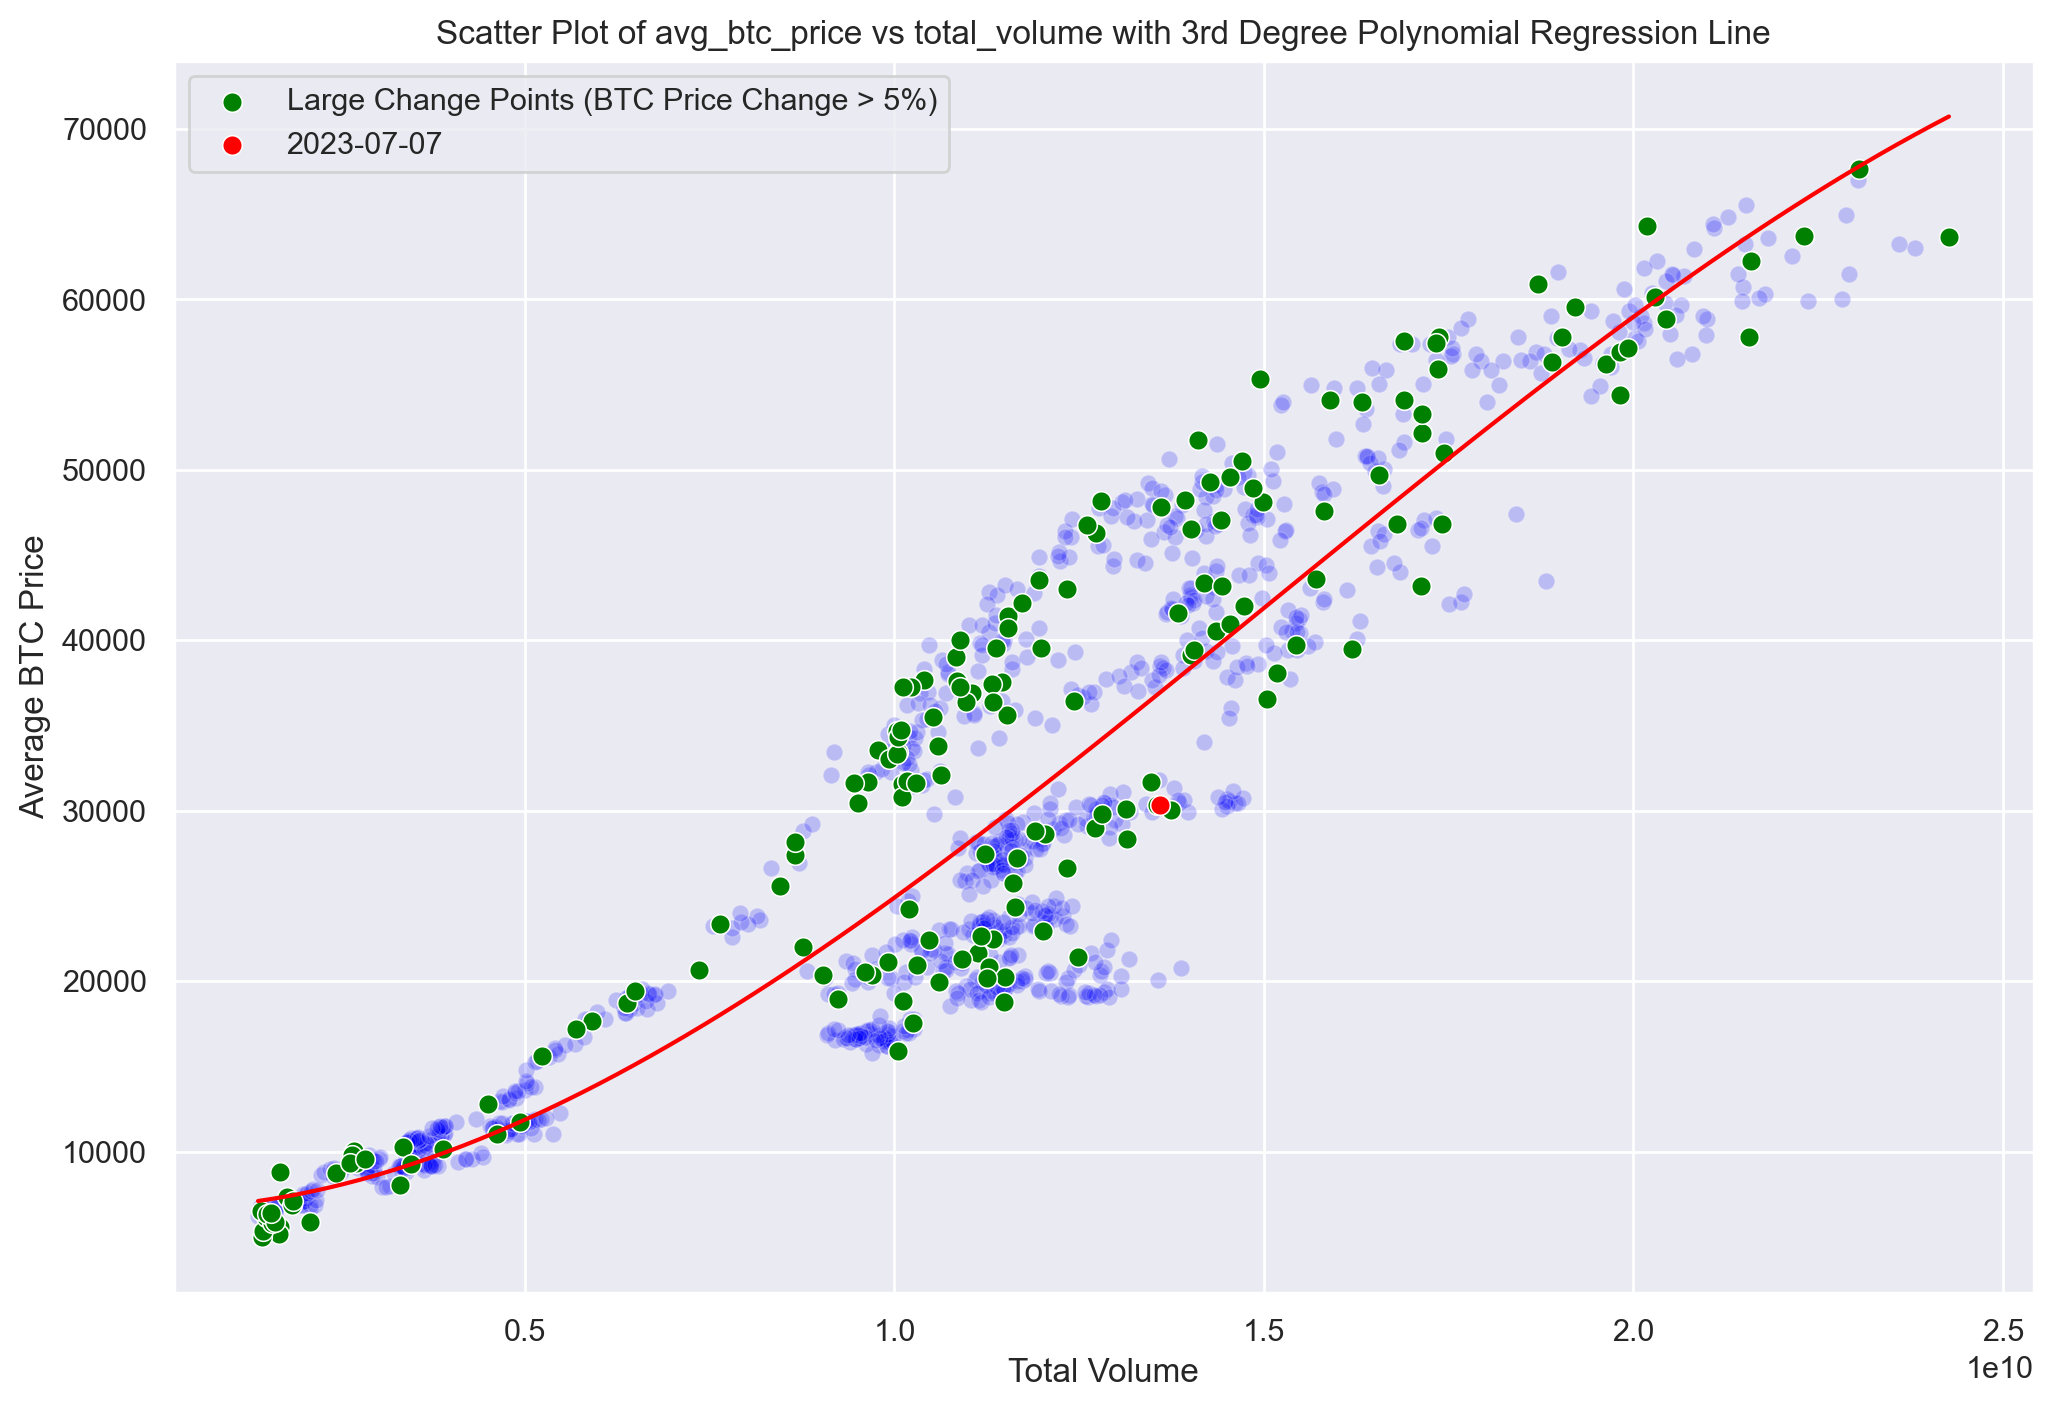

(array([ 0.00000000e+00, -1.51581589e-26,  2.33844482e-16, -5.15411436e-27]),
 6661.823978261957)

In [224]:
import sklearn.linear_model as lm
from sklearn.preprocessing import PolynomialFeatures

poly_3 = PolynomialFeatures(degree=3)

total_volume_poly_3 = poly_3.fit_transform(data['total_volume'].values.reshape(-1, 1))

model_poly_3 = lm.LinearRegression()
model_poly_3.fit(total_volume_poly_3, data['avg_btc_price'])

poly_coefs_3 = model_poly_3.coef_
poly_intercept_3 = model_poly_3.intercept_

total_volume_range_3 = np.linspace(data['total_volume'].min(), data['total_volume'].max(), num=100).reshape(-1, 1)

total_volume_range_poly_3 = poly_3.transform(total_volume_range_3)

avg_btc_price_predicted_3 = model_poly_3.predict(total_volume_range_poly_3)

# Calculate the daily change in 'avg_btc_price'
data['avg_btc_price_change'] = data['avg_btc_price'].pct_change()

# Create a new column to indicate whether the daily change is greater than 5%
data['large_change'] = (data['avg_btc_price_change'].abs() > 0.05)

plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='total_volume', y='avg_btc_price', data=data, color='blue', alpha=0.2)

# Add the points with large change
sns.scatterplot(x='total_volume', y='avg_btc_price', data=data[data['large_change']], color='green',
                alpha=1, s=50, label='Large Change Points (BTC Price Change > 5%)')
plt.plot(total_volume_range_3, avg_btc_price_predicted_3, color='red')

sns.scatterplot(x='total_volume', y='avg_btc_price', data=data[data.ds == '2023-07-07 20:00:00'], color='red',
                alpha=1, s=50, label='2023-07-07')

plt.title('Scatter Plot of avg_btc_price vs total_volume with 3rd Degree Polynomial Regression Line')
plt.xlabel('Total Volume')
plt.ylabel('Average BTC Price')
plt.show()

poly_coefs_3, poly_intercept_3


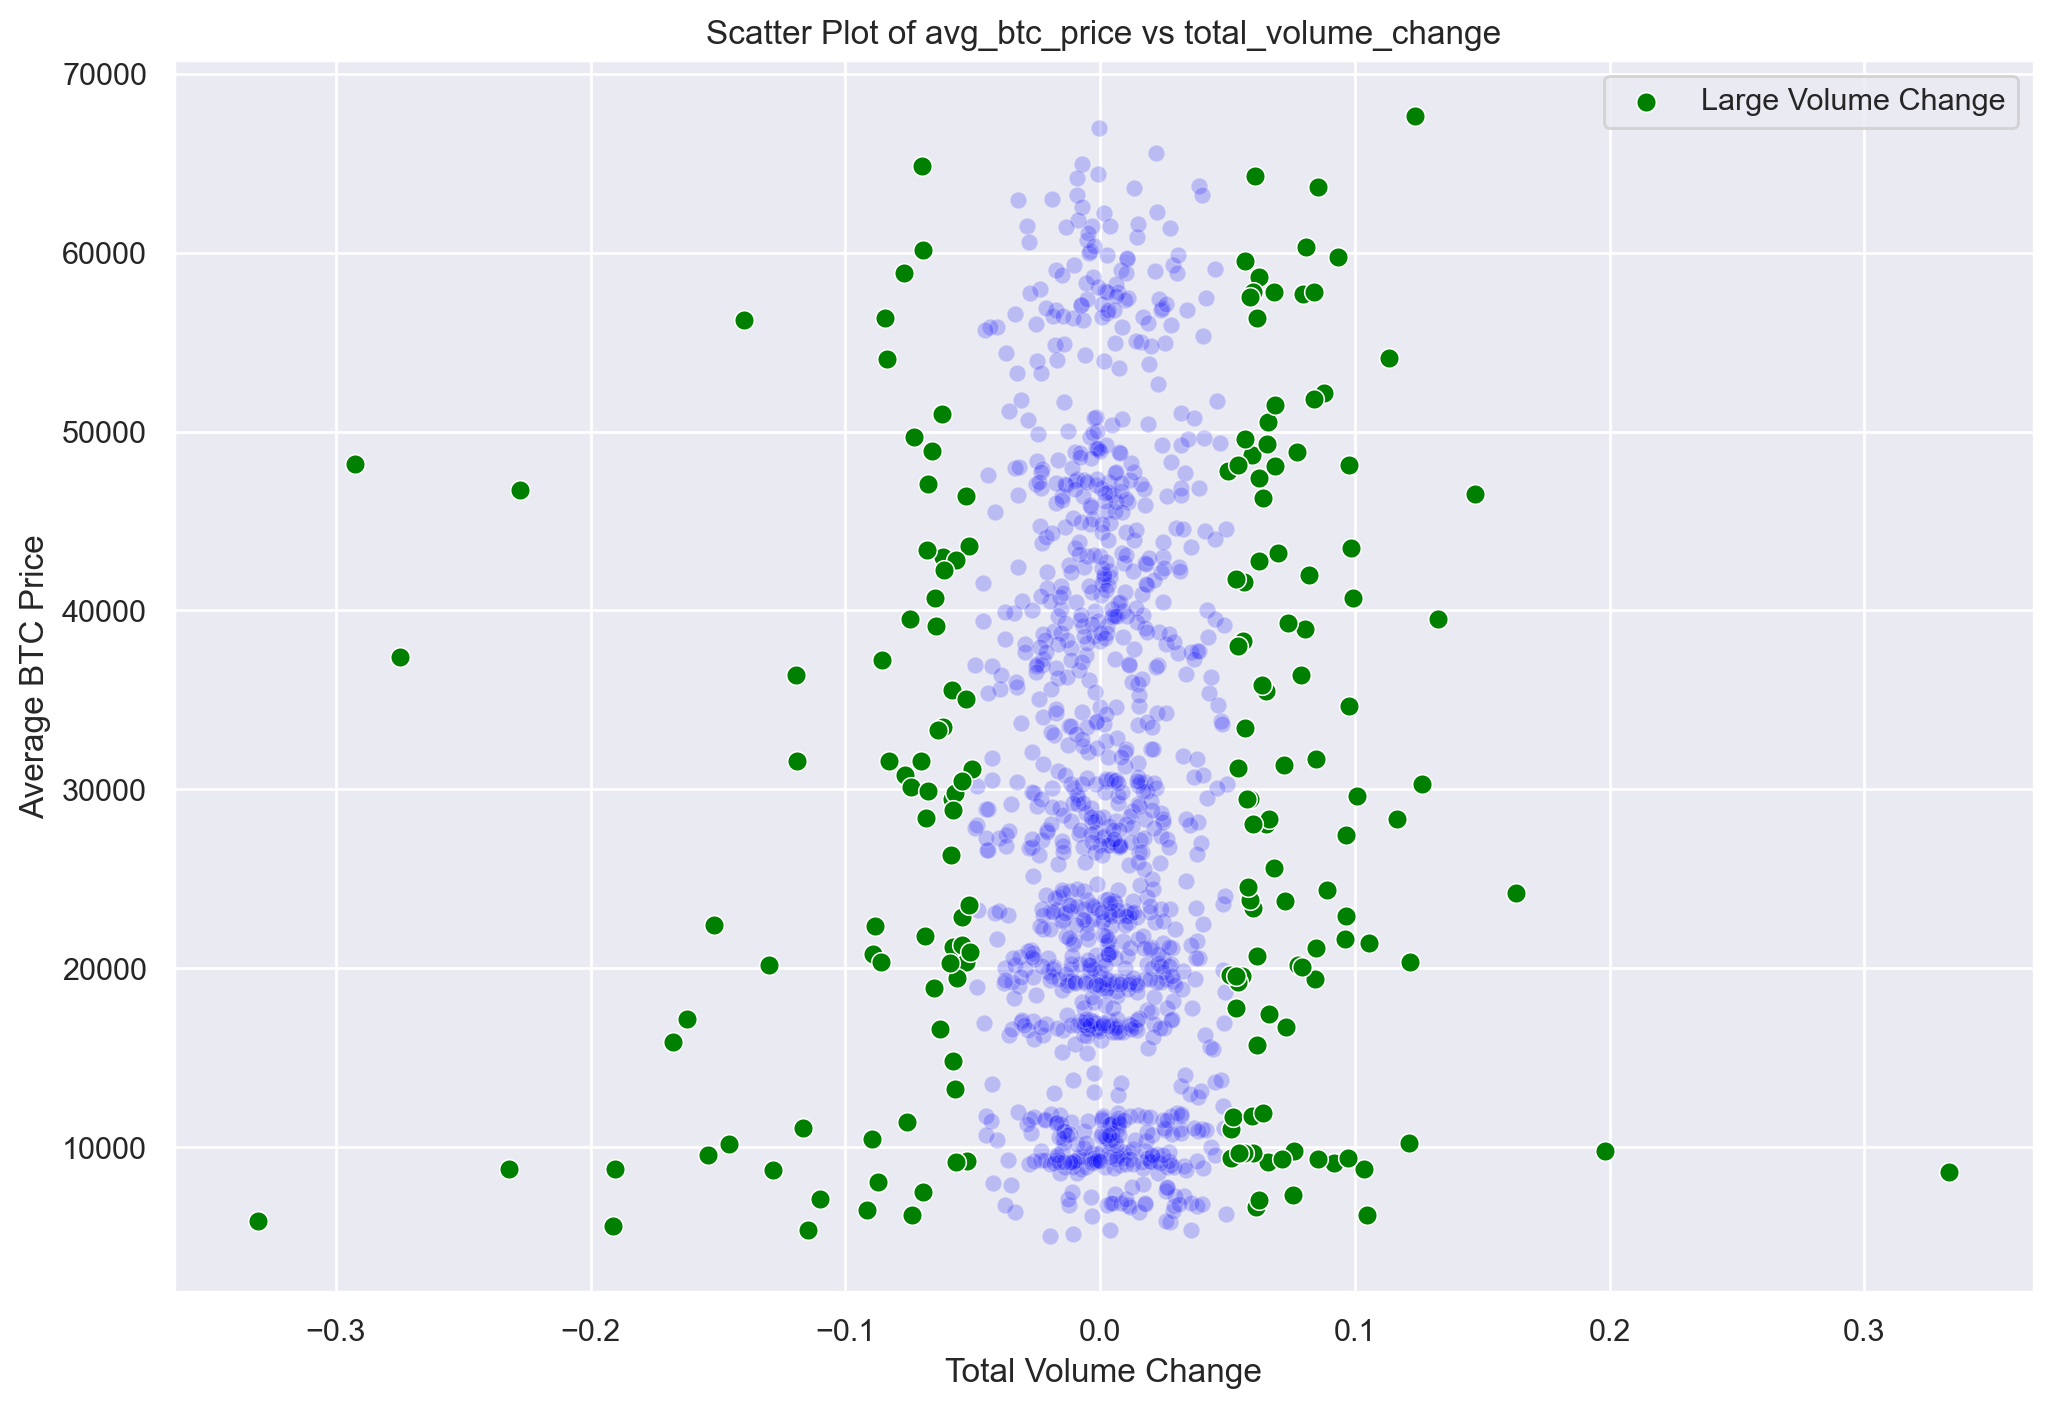

In [225]:
# Calculate the daily change in 'total_volume'
data['total_volume_change'] = data['total_volume'].pct_change()

# Create a new column to indicate whether the daily change is greater than 5%
data['large_volume_change'] = (data['total_volume_change'].abs() > 0.05)

# Create a scatter plot of 'avg_btc_price' vs 'total_volume_change'
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='total_volume_change', y='avg_btc_price', data=data, color='blue', alpha=0.2)
sns.scatterplot(x='total_volume_change', y='avg_btc_price', data=data[data.large_volume_change], color='green',
                alpha=1, s=50, label='Large Volume Change')
plt.title('Scatter Plot of avg_btc_price vs total_volume_change')
plt.xlabel('Total Volume Change')
plt.ylabel('Average BTC Price')
plt.show()


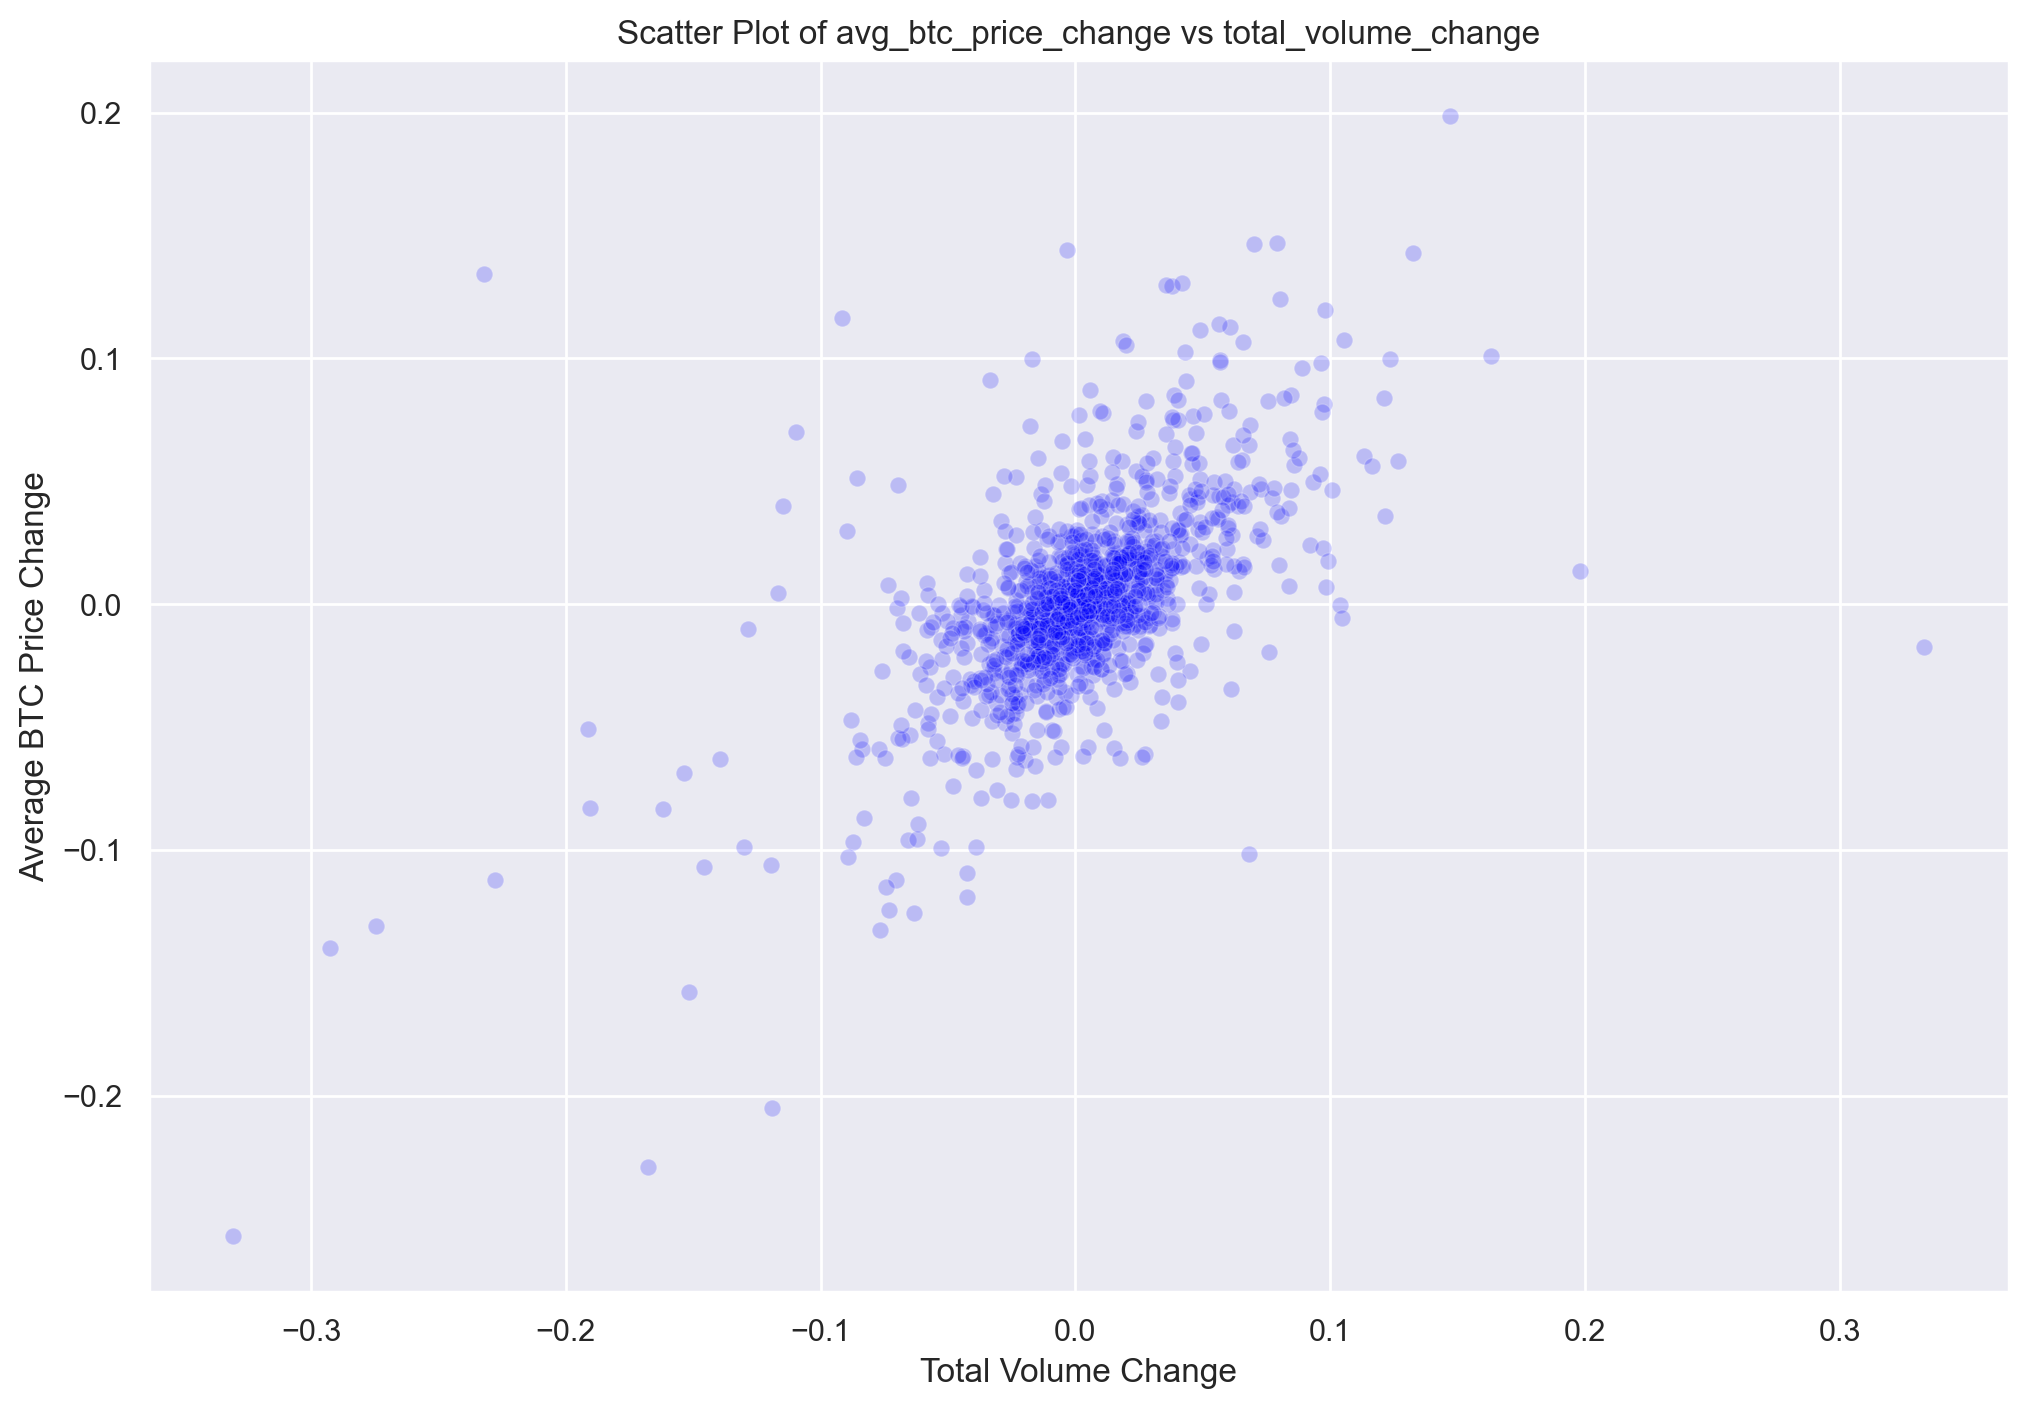

0.6050061760136218

In [226]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='total_volume_change', y='avg_btc_price_change', data=data, color='blue', alpha=0.2)
plt.title('Scatter Plot of avg_btc_price_change vs total_volume_change')
plt.xlabel('Total Volume Change')
plt.ylabel('Average BTC Price Change')
plt.show()

# Calculate the correlation between 'total_volume_change' and 'avg_btc_price_change'
correlation = data['total_volume_change'].corr(data['avg_btc_price_change'])
correlation


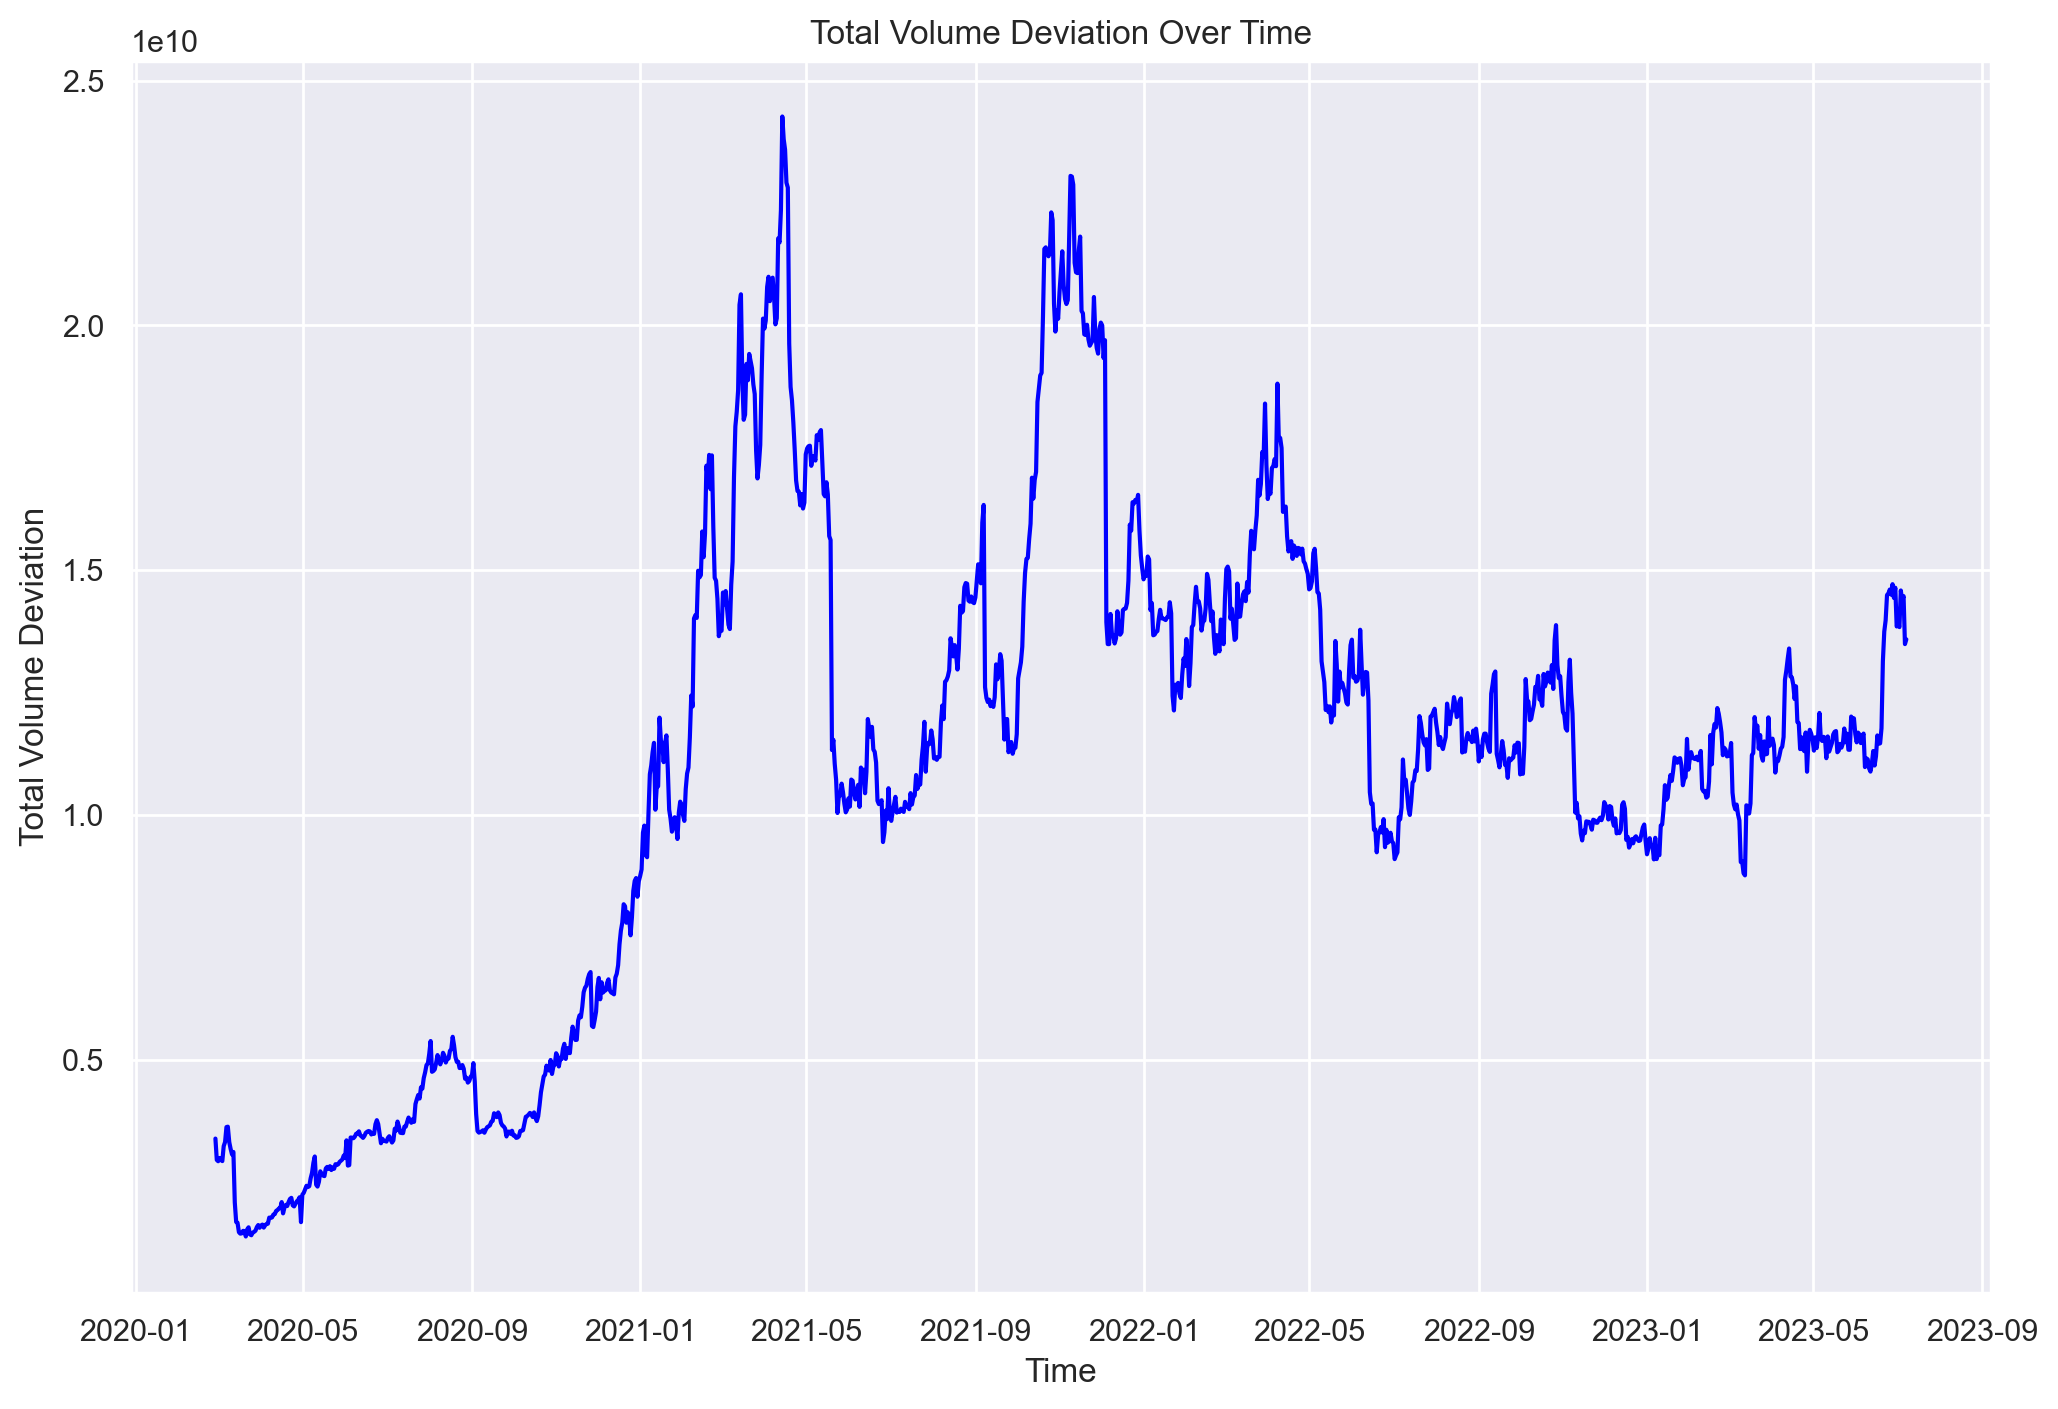

In [229]:
# Fit and transform 'total_volume' with PolynomialFeatures
total_volume_poly_3 = poly_3.fit_transform(data['total_volume'].values.reshape(-1, 1))

from sklearn.linear_model import LinearRegression

# Re-define and re-fit LinearRegression model
model_poly_3 = LinearRegression()
model_poly_3.fit(total_volume_poly_3, data['avg_btc_price'])

# Predict 'total_volume' based on 'avg_btc_price'
total_volume_predicted = model_poly_3.predict(avg_btc_price_poly_3)

# Calculate the difference between actual 'total_volume' and predicted 'total_volume'
data['total_volume_deviation'] = data['total_volume'] - total_volume_predicted

# Plot 'total_volume_deviation' over time
plt.figure(figsize=(12, 8), dpi=200)
sns.lineplot(x=data.index, y='total_volume_deviation', data=data, color='blue')
plt.title('Total Volume Deviation Over Time')
plt.xlabel('Time')
plt.ylabel('Total Volume Deviation')
plt.show()


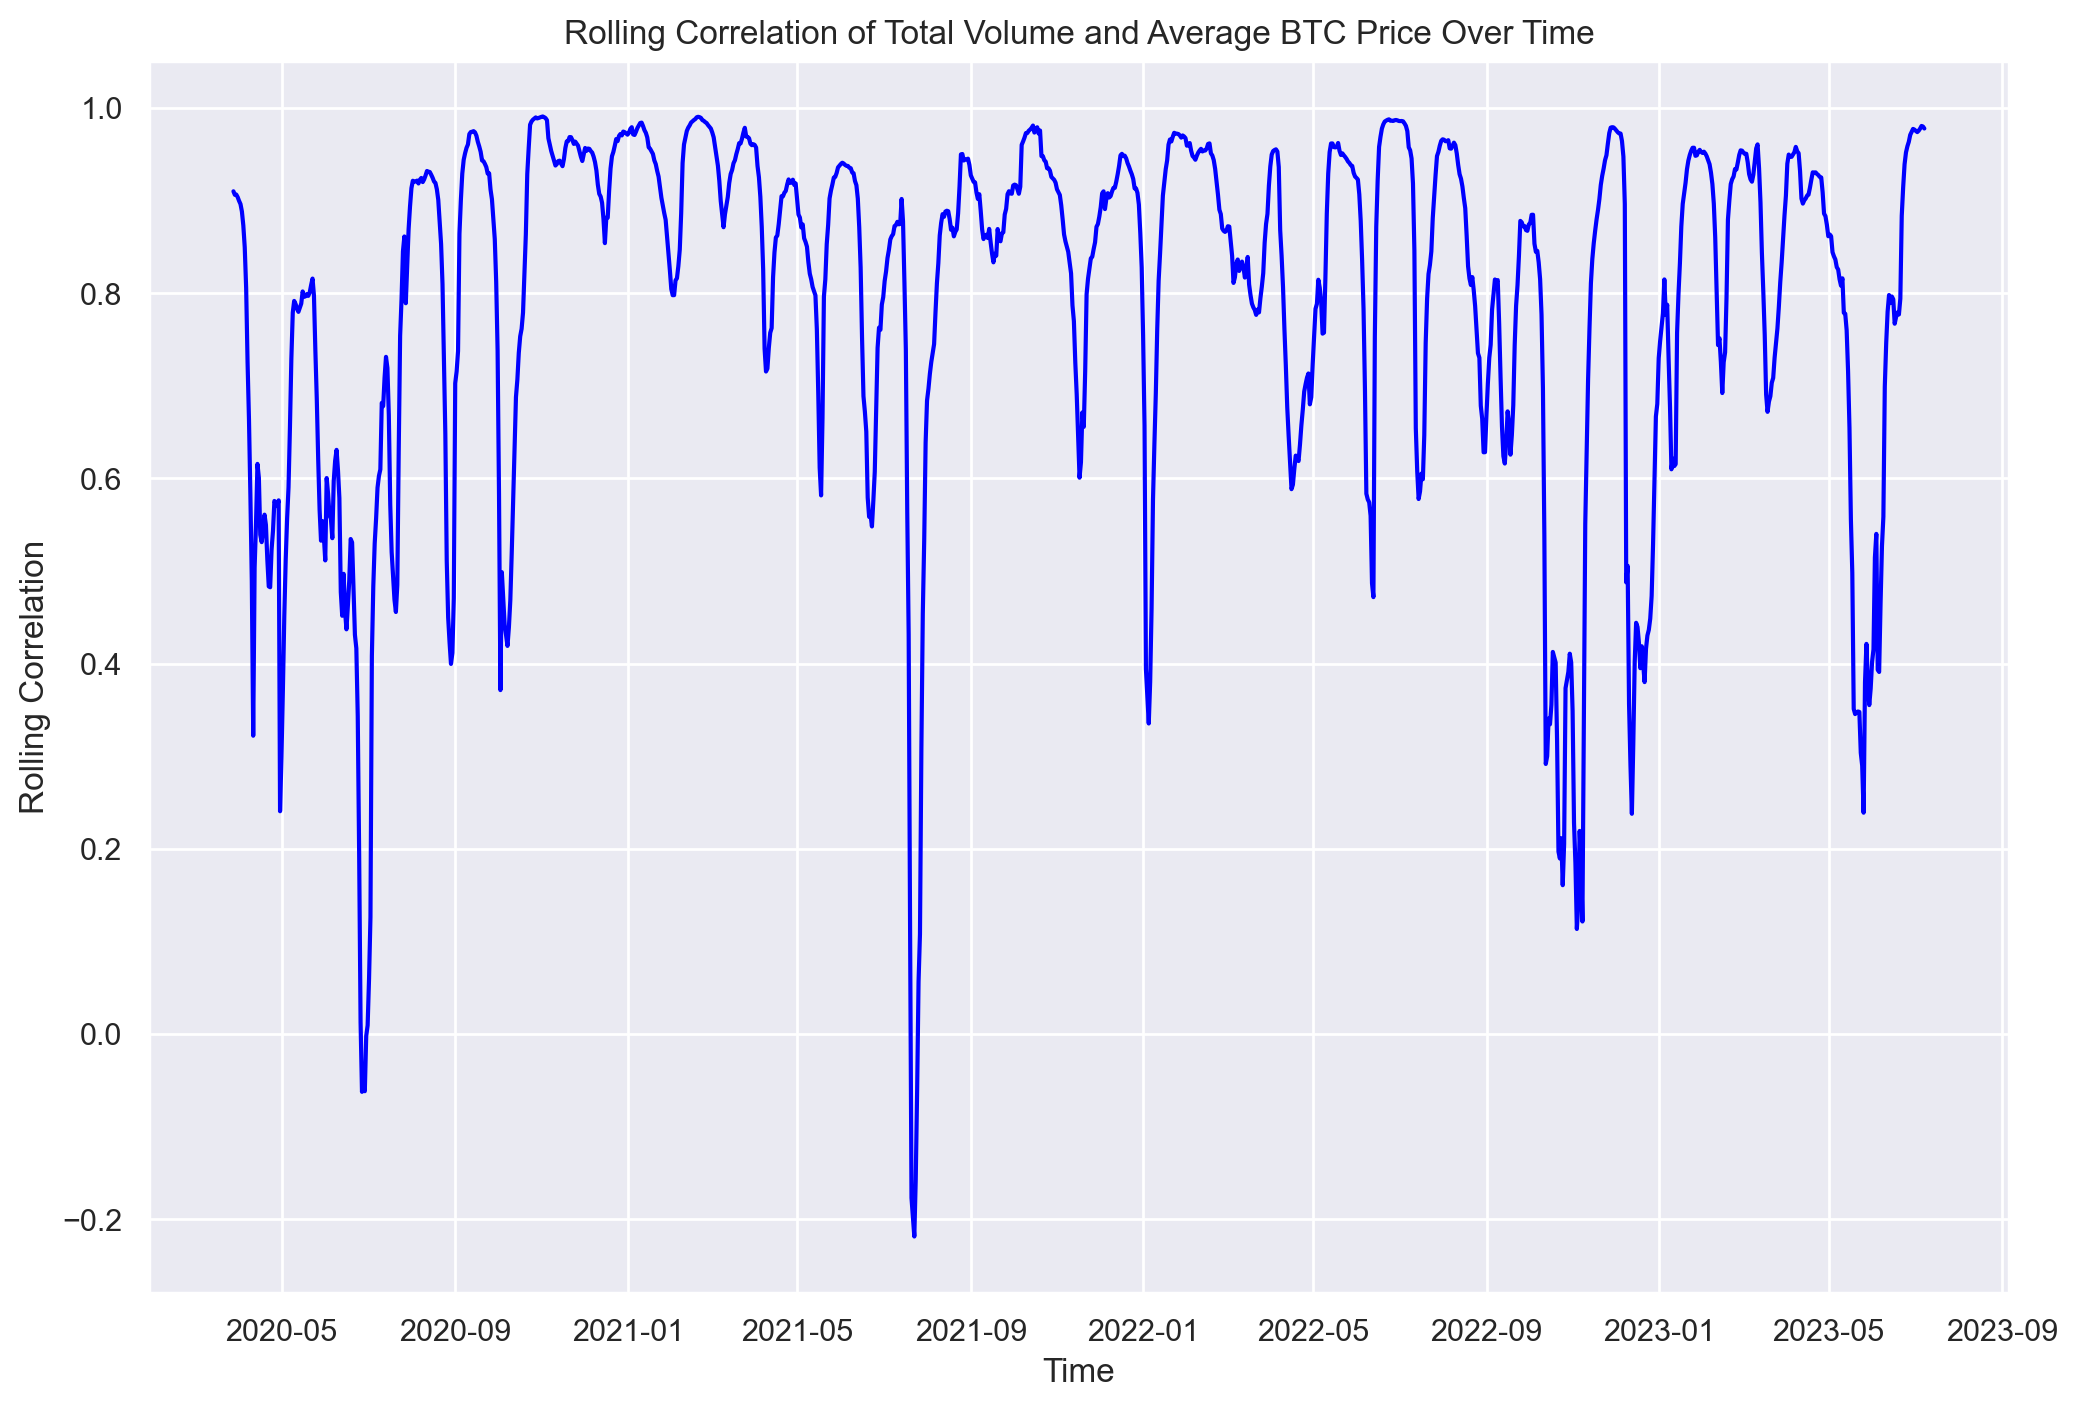

In [230]:
rolling_corr = data['total_volume'].rolling(window=30).corr(data['avg_btc_price'])

# Plot the rolling correlation over time
plt.figure(figsize=(12, 8), dpi=200)
sns.lineplot(x=rolling_corr.index, y=rolling_corr.values, color='blue')
plt.title('Rolling Correlation of Total Volume and Average BTC Price Over Time')
plt.xlabel('Time')
plt.ylabel('Rolling Correlation')
plt.show()


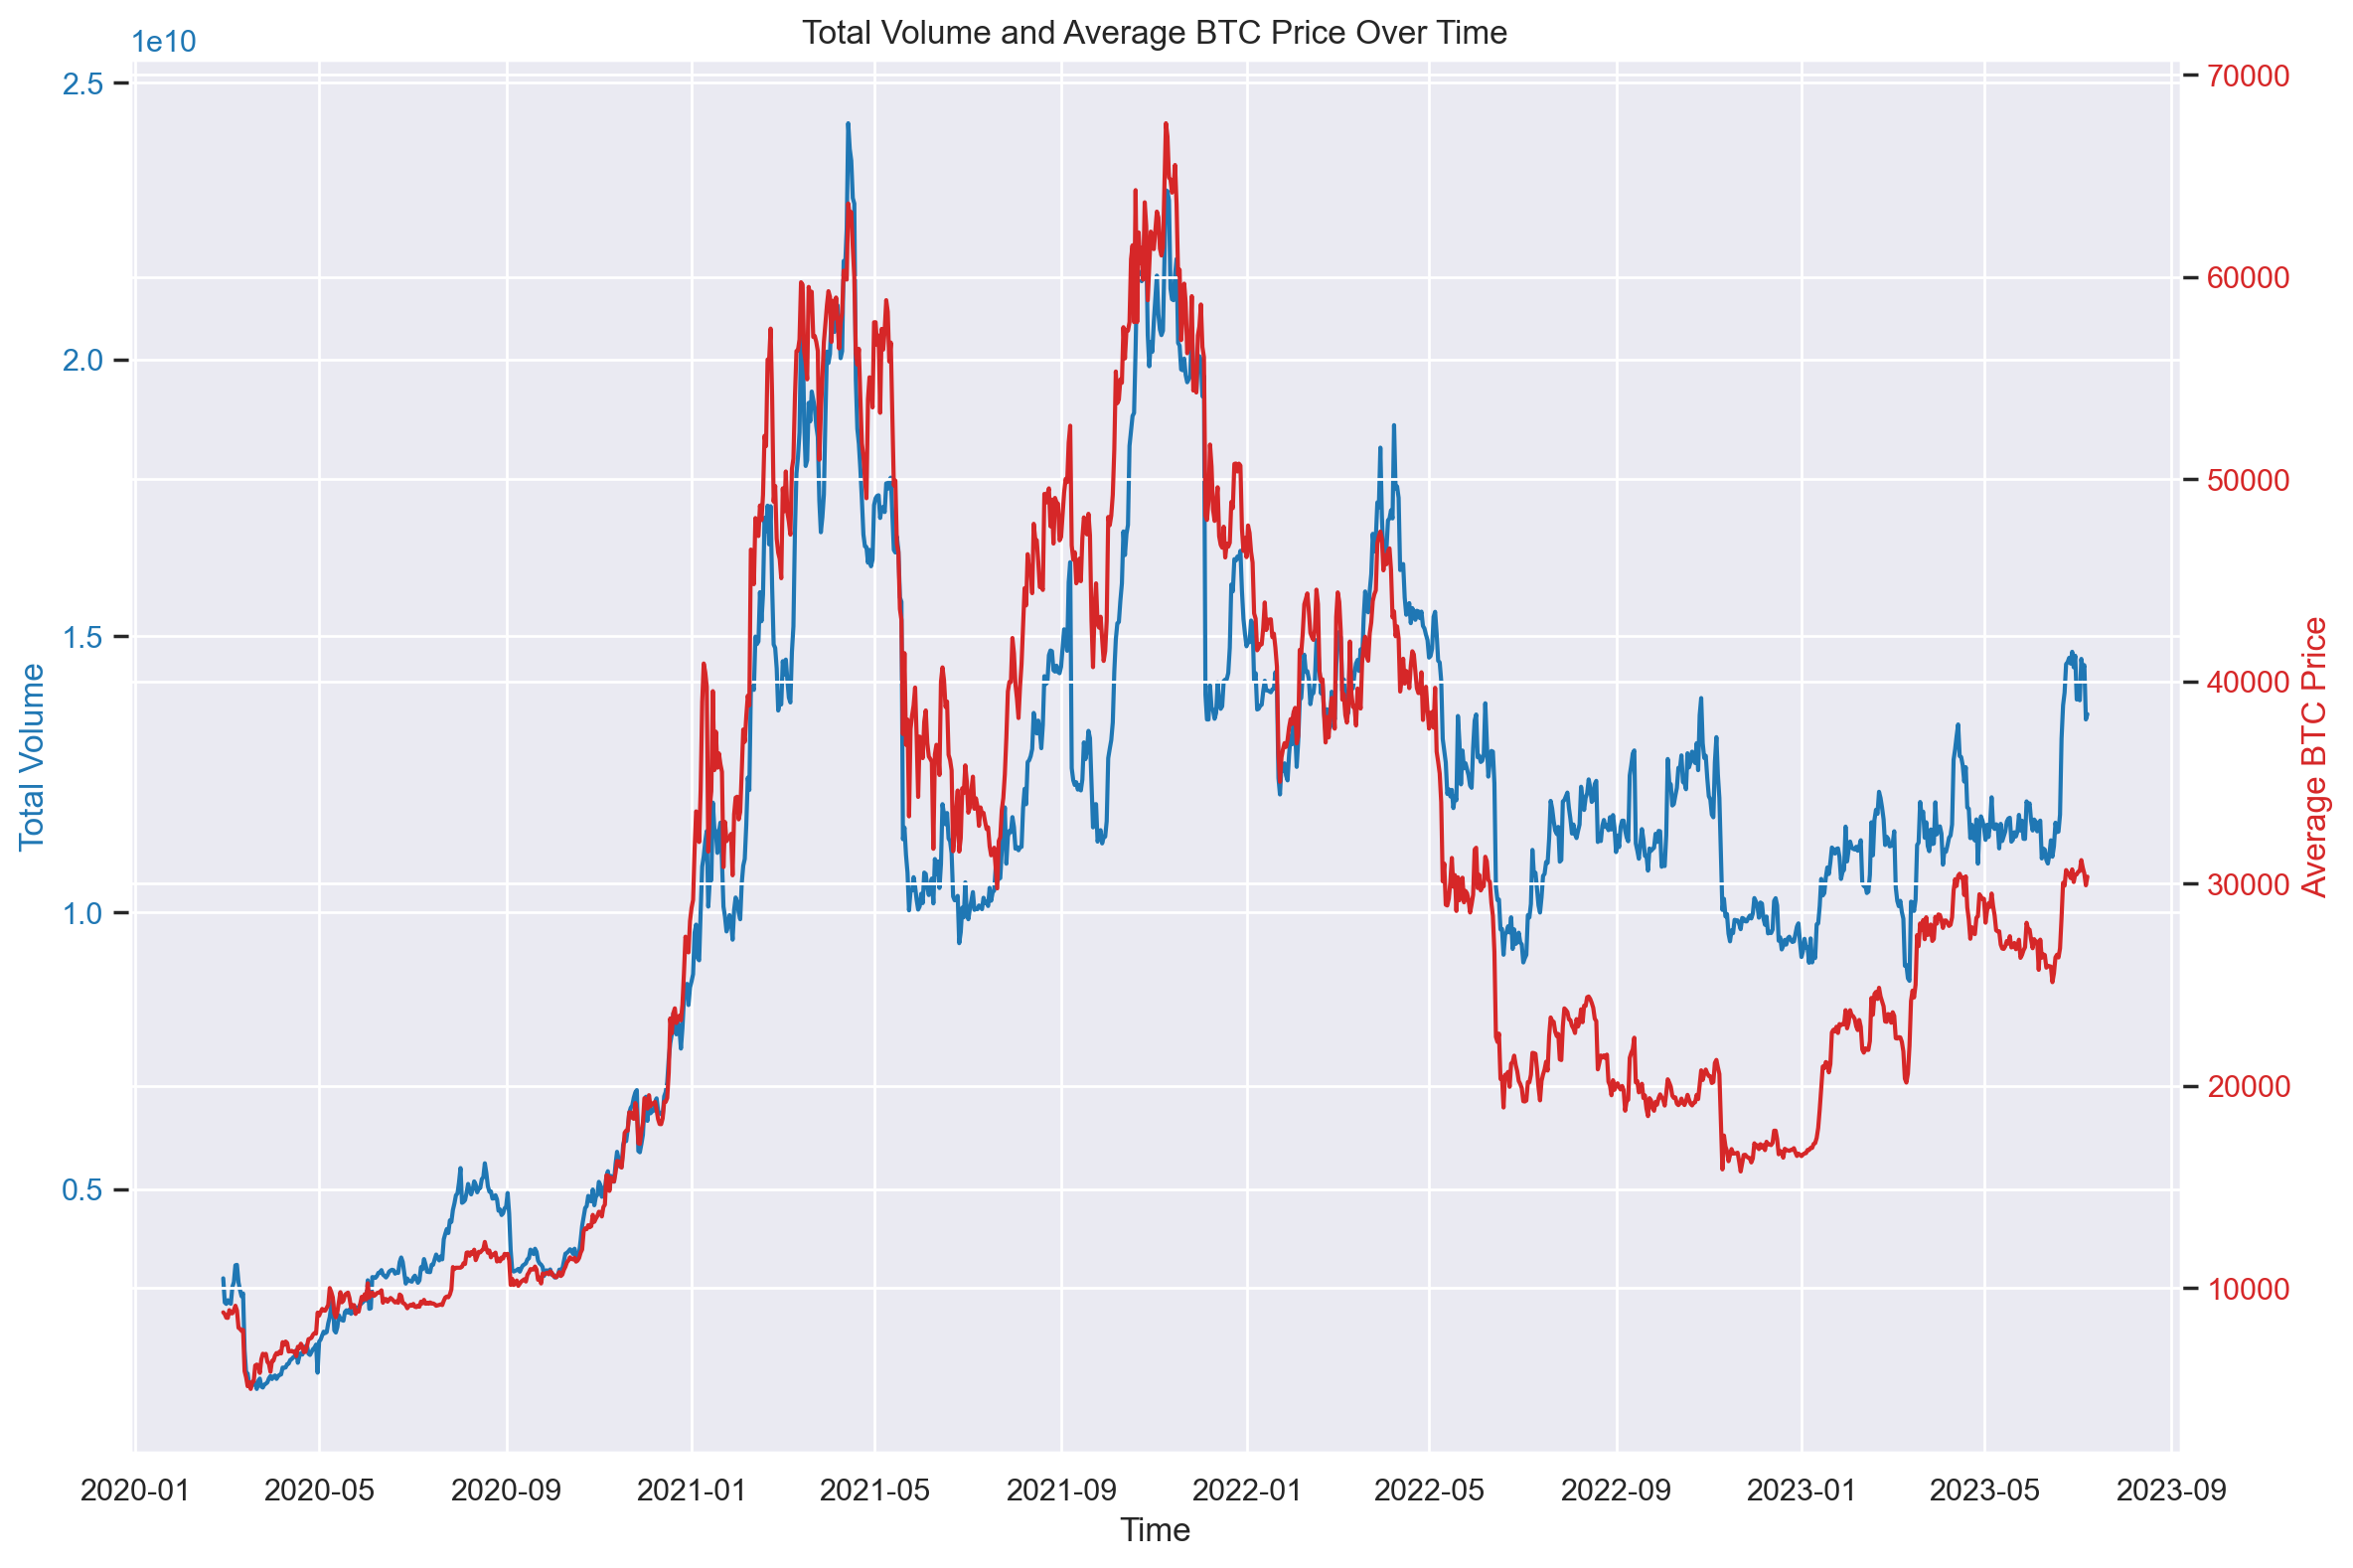

In [231]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 8), dpi=200)

# Plot 'total_volume' over time
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Total Volume', color=color)
ax1.plot(data.index, data['total_volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the same x-axis
ax2 = ax1.twinx()

# Plot 'avg_btc_price' over time
color = 'tab:red'
ax2.set_ylabel('Average BTC Price', color=color)
ax2.plot(data.index, data['avg_btc_price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title to the plot
fig.tight_layout()
plt.title('Total Volume and Average BTC Price Over Time')
plt.show()
